# import modules

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
from h5py import File as h5_file
import matplotlib.pyplot as plt
from matplotlib import ticker

from utilities import turbo_w, plot2d


In [2]:
import matplotlib.colors as col
import matplotlib.cm as cm
def gen_cmap(N, cmap = 'hsv'):
    color_norm = col.Normalize(vmin = 0, vmax = N-1)
    scalar_map = cm.ScalarMappable(norm = color_norm, cmap = cmap)
    def map_index_to_rgb(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb

In [3]:
from matplotlib import rcParams

rcParams['font.size'] = 7
rcParams['lines.linewidth'] = 1
rcParams['axes.labelsize'] = 7
rcParams['axes.labelpad'] = 1
rcParams['axes.linewidth']= 0.7
rcParams['ytick.minor.width']= 0.5
rcParams['figure.titlesize']= 9
rcParams['legend.fontsize']= 7
rcParams['legend.frameon']= False
rcParams['legend.handletextpad']= 0.2
rcParams['legend.markerscale']= 1.2
rcParams['xtick.labelsize']= 6
rcParams['ytick.labelsize']= 6
rcParams['xtick.major.size']= 3
rcParams['ytick.major.size']= 3
rcParams['xtick.major.pad']= 3
rcParams['ytick.major.pad']= 3
rcParams['xtick.major.width']= 0.7
rcParams['ytick.major.width']= 0.7
rcParams['xtick.minor.size']= 1.7
rcParams['ytick.minor.size']= 1.7
rcParams['xtick.minor.pad']= 2.8
rcParams['ytick.minor.pad']= 2.8
rcParams['xtick.minor.width']= 0.6
rcParams['ytick.minor.width']= 0.6

rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
rcParams['xtick.top']=True
rcParams['ytick.right']=True

In [4]:
mm = 1/25.4  # centimeters in inches
dpi = 150

colors = ["white", "indigo"]
from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list("mycmap", colors)

marker_m = 'o'
color_m = '#F96815' #'darkorange'

marker_e = 's'
color_e = '#028A0F' # darkgreen'

markersize = 1.5
elinewidth = 0.25
capsize = 0.5
capthick = 0.25

elasticLineError = 2 # in meV

scale = 3.2 # for calculated RIXS intensity

def normalize(y):
    return (y-np.min(y)) / (np.max(y)-np.min(y))

# Figure 1

In [5]:
Emap_data = h5_file('data/RIXS_data/Edep.hdf', 'r')
AIM_rixs_field_sim = h5_file('data/edrixs/AIM_rixs_field_sim.hdf', 'r')

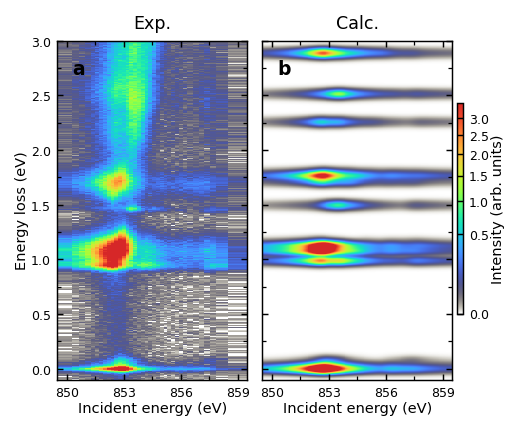

In [6]:
# plt.close('all')
fig, axs = plt.subplots(1, 2, dpi=dpi, figsize=(88*mm,70*mm), sharex=True, sharey=True, gridspec_kw=dict(wspace=0.08, top=0.93, left=0.14, bottom=0.11,right=0.9))
cax = fig.add_axes([0.91,0.12+0.15,0.01,0.93-0.12-0.3]) # axis for colorbar
colormap=turbo_w()


ims = [0,0,]
ims[0] = plot2d(ax=axs[0], x=Emap_data['Ei'][:], y=Emap_data['eloss'][:], Int=Emap_data['intensity'][:], colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[1], x=AIM_rixs_field_sim['omega'][:], y=AIM_rixs_field_sim['eloss'][:], Int=AIM_rixs_field_sim['LH'][:]*scale, colormap=colormap, rasterized=True)

# axis range
for ax in axs:
    ax.set_xlim(849.5,859.5)
    ax.set_ylim(-0.1,3)
    ax.set_xticks(np.arange(850,860.1,3))
    # ax.set_yticks(np.arange(0,3.1,0.5))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
# axis label
axs[0].set_ylabel('Energy loss (eV)')
axs[0].set_xlabel('Incident energy (eV)')
axs[1].set_xlabel('Incident energy (eV)')


# title
axs[0].set_title('Exp.')
axs[1].set_title('Calc.')


# colorbar
for im in ims:
    im.set_norm(col.PowerNorm(gamma=0.5))
    im.set_clim(0, 3.5)
cbar = plt.colorbar(ims[1], cax=cax)
cbar.set_ticks(np.arange(0, 3.1, 0.5))
cbar.set_label('Intensity (arb. units)')


# label
x = 0.08
y = 0.9
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')


fig.savefig('energy_map.pdf', dpi=300)

# Figure 2

In [7]:
map_H0L_data = h5_file('data/RIXS_data/H0L_T40K.hdf', 'r')
map_0KL_data = h5_file('data/RIXS_data/0KL_T40K.hdf', 'r')

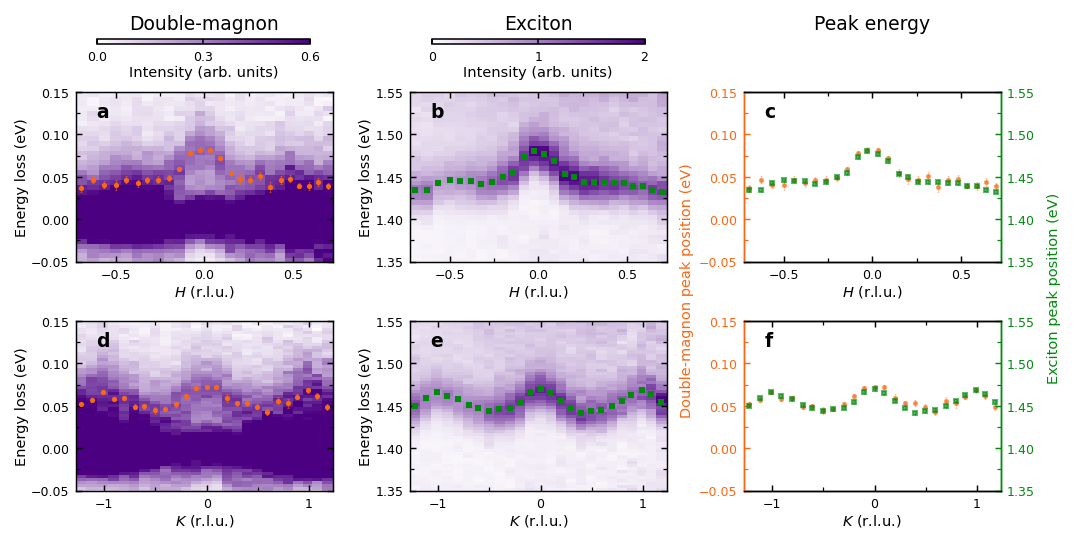

In [8]:
# plt.close('all')
alpha = 0.6
colormap = mycmap

fig, axs = plt.subplots(2, 3, dpi=dpi, figsize=(180*mm,90*mm), 
                        gridspec_kw=dict(wspace=0.3, hspace=0.35,top=0.84, left=0.07, right=0.94, bottom=0.09,
                                         width_ratios=[1, 1, 1], height_ratios=[1, 1])
                       )


cax0 = fig.add_axes([0.09,0.93,0.2,0.01]) # axis for colorbar
cax1 = fig.add_axes([0.405,0.93,0.2,0.01]) # axis for colorbar

ims = [0,0,0,0]
ims[0] = plot2d(ax=axs[0,0], x=map_H0L_data['H'], y=map_H0L_data['eloss'], Int=map_H0L_data['intensity'], colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[0,1], x=map_H0L_data['H'], y=map_H0L_data['eloss'], Int=map_H0L_data['intensity'], colormap=colormap, rasterized=True)
ims[2] = plot2d(ax=axs[1,0], x=map_0KL_data['K'], y=map_0KL_data['eloss'], Int=map_0KL_data['intensity'], colormap=colormap, rasterized=True)
ims[3] = plot2d(ax=axs[1,1], x=map_0KL_data['K'], y=map_0KL_data['eloss'], Int=map_0KL_data['intensity'], colormap=colormap, rasterized=True)

x,y,yerr = np.loadtxt('data/RIXS_fits/H0L_40K_fits_2magnon_center.txt', delimiter='\t', comments='# ', unpack='True')
y = y / 1e3
yerr = np.sqrt(yerr**2 + elasticLineError**2) / 1e3
axs[0,0].errorbar(x, y, yerr=yerr,marker=marker_m, color=color_m, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick)
axs[0,2].errorbar(x, y, yerr=yerr,marker=marker_m, color=color_m, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)



x,y,yerr = np.loadtxt('data/RIXS_fits/H0L_40K_fits_exciton_center.txt', delimiter='\t', comments='# ', unpack='True')
y = y / 1e3
yerr = np.sqrt(yerr**2 + elasticLineError**2) / 1e3
axs[0,1].errorbar(x, y, yerr=yerr,marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick)
ax0 = axs[0,2].twinx()
ax0.errorbar(x, y, yerr=yerr,marker=marker_e, color=color_e, ls='',markersize=markersize,
             elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)

x,y,yerr = np.loadtxt('data/RIXS_fits/0KL_40K_fits_2magnon_center.txt', delimiter='\t', comments='# ', unpack='True')
y = y / 1e3
yerr = np.sqrt(yerr**2 + elasticLineError**2) / 1e3
axs[1,0].errorbar(x, y, yerr=yerr,marker=marker_m, color=color_m, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick)
axs[1,2].errorbar(x, y, yerr=yerr,marker=marker_m, color=color_m, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)


x,y,yerr = np.loadtxt('data/RIXS_fits/0KL_40K_fits_exciton_center.txt', delimiter='\t', comments='# ', unpack='True')
y = y / 1e3
yerr = np.sqrt(yerr**2 + elasticLineError**2) / 1e3
axs[1,1].errorbar(x, y, yerr=yerr,marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick)
ax1 = axs[1,2].twinx()
ax1.errorbar(x, y, yerr=yerr,marker=marker_e, color=color_e, ls='',markersize=markersize,
             elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)


# axis range
xlim = axs[0,0].get_xlim()
for ax in axs[0,:]:
    ax.set_xlim(xlim)
xlim = axs[1,0].get_xlim()
for ax in axs[1,:]:
    ax.set_xlim(xlim)

axs[0,0].set_ylim(-0.05,0.15)
axs[0,1].set_ylim(1.35,1.55)
axs[0,2].set_ylim(-0.05,0.15)
ax0.set_ylim(1.35,1.55)
axs[1,0].set_ylim(-0.05,0.15)
axs[1,1].set_ylim(1.35,1.55)
axs[1,2].set_ylim(-0.05,0.15)
ax1.set_ylim(1.35,1.55)

ims[0].set_clim(0, 0.6)
ims[1].set_clim(0, 2)
ims[2].set_clim(0, 0.6)
ims[3].set_clim(0, 2)



# title
x = 0.5
y = 1.37
axs[0,0].text(x=x, y=y, s='Double-magnon', fontsize=rcParams['figure.titlesize'], transform=axs[0,0].transAxes, ha='center', color='k')
axs[0,1].text(x=x, y=y, s='Exciton', fontsize=rcParams['figure.titlesize'], transform=axs[0,1].transAxes, ha='center', color='k')
axs[0,1].text(x=x, y=y, s='Peak energy', fontsize=rcParams['figure.titlesize'], transform=axs[0,2].transAxes, ha='center', color='k')

# axis label
for ax in axs[0,:]:
    ax.set_xticks((-0.5, 0, 0.5))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.set_xlabel(r'$H$ (r.l.u.)')
ax0.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

for ax in axs[1,:]:
    ax.set_xticks((-1, 0, 1))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.set_xlabel(r'$K$ (r.l.u.)')
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

for i in range(2):
    for j in range(2):
        axs[i,j].set_ylabel('Energy loss (eV)')
axs[0,2].text(x=-0.25, y=-0.9, s='Double-magnon peak position (eV)', fontsize=rcParams['axes.labelsize'], transform=axs[0,2].transAxes, color=color_m, rotation='vertical')
axs[0,2].text(x=1.18, y=-0.7, s='Exciton peak position (eV)', fontsize=rcParams['axes.labelsize'], transform=axs[0,2].transAxes, color=color_e, rotation='vertical')

# axis color
for ax, color in zip([axs[0,2], ax0], [color_m, color_e]):
    for t in ax.get_yticklabels():
        t.set_color(color)
        ax.tick_params(axis='y', which='both', colors=color)
        ax.spines['left'].set_color(color_m)
        ax.spines['right'].set_color(color_e)
for ax, color in zip([axs[1,2], ax1], [color_m, color_e]):
    for t in ax.get_yticklabels():
        t.set_color(color)
        ax.tick_params(axis='y', which='both', colors=color)
        ax.spines['left'].set_color(color_m)
        ax.spines['right'].set_color(color_e)

# colorbar
cbar0 = plt.colorbar(ims[0], cax=cax0, orientation='horizontal')
cbar0.set_ticks(np.arange(0, 0.61, 0.3))
cbar0.ax.tick_params(width=0.75, length=2.5)
cbar0.outline.set_linewidth(0.75)
cbar1 = plt.colorbar(ims[1], cax=cax1, orientation='horizontal')
cbar1.set_ticks(np.arange(0, 2.1, 1))
cbar1.ax.tick_params(width=0.75, length=2.5)
cbar1.outline.set_linewidth(0.75)
cbar0.set_label('Intensity (arb. units)')
cbar1.set_label('Intensity (arb. units)')


# label
x = 0.08
y = 0.85
axs[0,0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,0].transAxes, color='k')
axs[0,1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,1].transAxes, color='k')
axs[0,2].text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,2].transAxes, color='k')
axs[1,0].text(x=x, y=y, s='d', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,0].transAxes, color='k')
axs[1,1].text(x=x, y=y, s='e', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,1].transAxes, color='k')
axs[1,2].text(x=x, y=y, s='f', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,2].transAxes, color='k')

fig.savefig('dispersion_LT.pdf', dpi=300)

# Figure 3

In [9]:
map_H0L_HT_data = h5_file('data/RIXS_data/H0L_T190K.hdf', 'r')

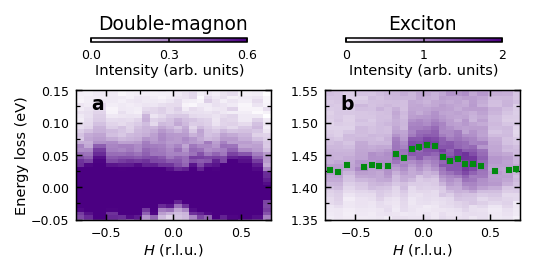

In [10]:
# plt.close('all')
fig, axs = plt.subplots(1, 2, dpi=dpi, figsize=(88*mm,43*mm), 
                        gridspec_kw=dict(wspace=0.28, left=0.135, right=0.99, bottom=0.17, top=0.68, 
                                         width_ratios=[1, 1])
                       )
colormap = mycmap


cax0 = fig.add_axes([0.215-0.05,0.87,0.3,0.016]) # axis for colorbar
cax1 = fig.add_axes([0.705-0.05,0.87,0.3,0.016]) # axis for colorbar

ims = [0,0]
ims[0] = plot2d(ax=axs[0], x=map_H0L_HT_data['H'], y=map_H0L_HT_data['eloss'], Int=map_H0L_HT_data['intensity'], colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[1], x=map_H0L_HT_data['H'], y=map_H0L_HT_data['eloss'], Int=map_H0L_HT_data['intensity'], colormap=colormap, rasterized=True)


x,y,yerr = np.loadtxt('data/RIXS_fits/H0L_190K_fits_exciton_center.txt', delimiter='\t', comments='# ', unpack='True')
y = y / 1e3
yerr = np.sqrt(yerr**2 + elasticLineError**2) / 1e3
axs[1].errorbar(x, y, yerr=yerr,marker=marker_e, color=color_e, ls='',markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick)


# axis range
xlim = axs[0].get_xlim()
axs[0].set_xlim(xlim)
axs[1].set_xlim(xlim)

axs[0].set_ylim(-0.05,0.15)
axs[1].set_ylim(1.35,1.55)


ims[0].set_clim(0, 0.6)
ims[1].set_clim(0, 2)


# title
x = 0.5
y = 1.47
axs[0].text(x=x, y=y, s='Double-magnon', fontsize=rcParams['figure.titlesize'], transform=axs[0].transAxes, ha='center', color='k')
axs[1].text(x=x, y=y, s='Exciton', fontsize=rcParams['figure.titlesize'], transform=axs[1].transAxes, ha='center', color='k')


# axis label
for ax in axs:
    ax.set_xticks((-0.5, 0, 0.5))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.set_xlabel(r'$H$ (r.l.u.)')
axs[0].set_ylabel('Energy loss (eV)')


# colorbar
cbar0 = plt.colorbar(ims[0], cax=cax0, orientation='horizontal')
cbar0.set_ticks(np.arange(0, 0.61, 0.3))
cbar0.ax.tick_params(width=0.75, length=2)
cbar0.outline.set_linewidth(0.75)
cbar1 = plt.colorbar(ims[1], cax=cax1, orientation='horizontal')
cbar1.set_ticks(np.arange(0, 2.1, 1))
cbar1.ax.tick_params(width=0.75, length=2)
cbar1.outline.set_linewidth(0.75)
cbar0.set_label('Intensity (arb. units)')
cbar1.set_label('Intensity (arb. units)')




# label
x = 0.08
y = 0.85
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')


fig.savefig('dispersion_HT.pdf', dpi=300)

# Figure 4

In [11]:
AIM_rixs_field_sticks_sim = h5_file('data/edrixs/AIM_rixs_field_sticks_sim.hdf', 'r')

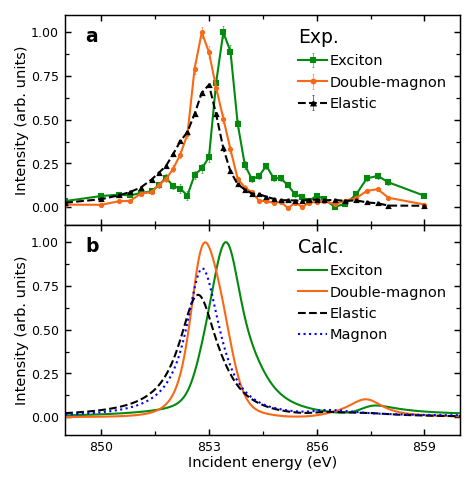

In [13]:
plt.close('all')
fig, axs = plt.subplots(2, 1, dpi=dpi, figsize=(88*mm,90*mm), gridspec_kw=dict(wspace=0.08, hspace=0, top=0.9, left=0.14, bottom=0.11,right=0.9))

norm = True
alpha = 1
marker_el = '^'
color_el = 'k'

x,y,yerr = np.loadtxt('data/RIXS_fits/Edep_fits_exciton_amplitude.txt', delimiter='\t', comments='# ', unpack='True')
y0 = np.max(y) if norm else 1
axs[0].errorbar(x, y/y0, yerr=yerr/y0,marker=marker_e, color=color_e, ls='-',markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha,label='Exciton')
x,y,yerr = np.loadtxt('data/RIXS_fits/Edep_fits_2magnon_amplitude.txt', delimiter='\t', comments='# ', unpack='True')
y0 = np.max(y) if norm else 1
axs[0].errorbar(x, y/y0, yerr=yerr/y0,marker=marker_m, color=color_m, ls='-',markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha,label='Double-magnon')
x,y,yerr = np.loadtxt('data/RIXS_fits/Edep_fits_elastic_amplitude.txt', delimiter='\t', comments='# ', unpack='True')
y0 = np.max(y) if norm else 1
axs[0].errorbar(x, y/y0*0.7, yerr=yerr/y0*0.8,marker=marker_el, color=color_el, ls='--',markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha,label='Elastic')


x = AIM_rixs_field_sticks_sim['omega'][:]
y = AIM_rixs_field_sticks_sim['LH'][:,(1.4<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<1.6)]
x0 = AIM_rixs_field_sticks_sim['eloss'][(1.4<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<1.6)]
y = np.trapz(y, x0, axis=1)
y0 = np.max(y) if norm else 1
axs[1].plot(x, y/y0, '-', color=color_e, alpha=alpha, label='Exciton')
x = AIM_rixs_field_sticks_sim['omega'][:]
y = AIM_rixs_field_sticks_sim['LH'][:,(0.06<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<0.1)]
x0 = AIM_rixs_field_sticks_sim['eloss'][(0.06<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<0.1)]
y = np.trapz(y, x0, axis=1)
y0 = np.max(y) if norm else 1
axs[1].plot(x, y/y0, '-', color=color_m, alpha=alpha, label='Double-magnon')
x = AIM_rixs_field_sticks_sim['omega'][:]
y = AIM_rixs_field_sticks_sim['LH'][:,(-0.02<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<0.02)]
x0 = AIM_rixs_field_sticks_sim['eloss'][(-0.02<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<0.02)]
y = np.trapz(y, x0, axis=1)
y0 = np.max(y) if norm else 1
axs[1].plot(x, y/y0*0.7, '--', color=color_el, alpha=alpha, label='Elastic')
x = AIM_rixs_field_sticks_sim['omega'][:]
y = AIM_rixs_field_sticks_sim['LH'][:,(0.02<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<0.05)]
x0 = AIM_rixs_field_sticks_sim['eloss'][(0.02<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<0.05)]
y = np.trapz(y, x0, axis=1)
y0 = np.max(y) if norm else 1
axs[1].plot(x, y/y0*0.85, ':', color='b', alpha=alpha, label='Magnon')


# axis range
for ax in axs:
    # ax.set_yscale('log')
    ax.set_xlim(849,860)
    ax.set_ylim(-0.1,1.1)
    ax.set_xticks(np.arange(850,860.1,3))
    ax.set_yticks(np.arange(0,1.1,0.25))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
    


# axis label
axs[0].set_ylabel('Intensity (arb. units)')
axs[1].set_ylabel('Intensity (arb. units)')
# axs[0].set_xlabel('Incident energy (eV)')
axs[1].set_xlabel('Incident energy (eV)')


axs[0].legend(title='Exp.', title_fontsize=9, alignment='left')
axs[1].legend(title='Calc.', title_fontsize=9, alignment='left')


# label
x = 0.05
y = 0.87
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')


fig.savefig('resonance.pdf', dpi=300)

# Extended Fig 1

In [14]:
spectra_H0L_data = h5_file('data/RIXS_data/H0L_T40K_1dSpectra.hdf', 'r')
spectra_H0L_fits = h5_file('data/RIXS_fits/H0L_40K_fits_spectra.hdf', 'r')

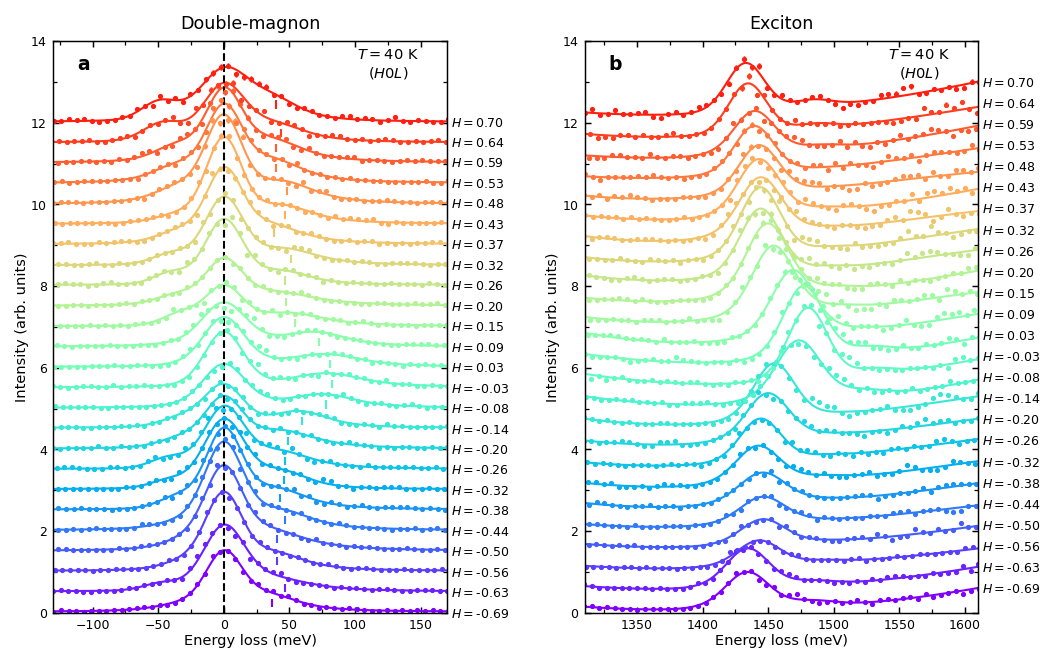

In [15]:
# plt.close('all')
fig, axs = plt.subplots(1, 2, dpi=dpi, figsize=(180*mm,110*mm), 
                        gridspec_kw=dict(wspace=0.35, left=0.07, right=0.94, bottom=0.07, top=0.95,
                                         width_ratios=[1, 1],)
                       )

alpha = 1
cmap = gen_cmap(26, cmap='rainbow')
yshift0 = 0.5
yshift1 = 0.5

Hs = spectra_H0L_data['H'][:]

for i, H in enumerate(Hs):
    x = spectra_H0L_data['spectra_H_{:.2f}'.format(H)]['eloss'][:]
    y = spectra_H0L_data['spectra_H_{:.2f}'.format(H)]['intensity'][:]
    yerr = spectra_H0L_data['spectra_H_{:.2f}'.format(H)]['error'][:]
    
    
    axs[0].errorbar(x, y+yshift0*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
    axs[1].errorbar(x, y+yshift1*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['x'][:]
    y = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['y'][:]
    axs[0].plot(x, y+yshift0*i,'-',color=cmap(i))
    
    x = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['exciton']['x'][:]
    y = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['exciton']['y'][:]
    axs[1].plot(x, y+yshift1*i,'-',color=cmap(i))


    # ticks at peak positions
    x = spectra_H0L_fits['ticks_x'][i]
    y = spectra_H0L_fits['ticks_y'][i]
    axs[0].vlines(x=x, ymin=y-0.35+yshift0*i, ymax=y-0.15+yshift0*i, ls='-', lw=1, color=cmap(i))
    
    
    # label
    axs[0].text(1.01, -0.008+0.0358*i, s='$H=${:.2f}'.format(Hs[i]), fontsize=6, transform=axs[0].transAxes, color='k')
    axs[1].text(1.01, 0.035+0.0369*i, s='$H=${:.2f}'.format(Hs[i]), fontsize=6, transform=axs[1].transAxes, color='k')

x = 0.85
y = 0.96
axs[0].text(x, y, s='$T= 40$ K\n($H0L$)', transform=axs[0].transAxes, color='k', va='center',ha='center')
axs[1].text(x, y, s='$T= 40$ K\n($H0L$)', transform=axs[1].transAxes, color='k', va='center',ha='center')

# title
axs[0].set_title('Double-magnon')
axs[1].set_title('Exciton')


# axis label
axs[0].set_xlabel('Energy loss (meV)')
axs[1].set_xlabel('Energy loss (meV)')
axs[0].set_ylabel('Intensity (arb. units)')
axs[1].set_ylabel('Intensity (arb. units)')

# axis range
axs[0].vlines(x=0, ymin=0, ymax=14, ls='--', colors='k',)
axs[0].set_ylim(0,14)
axs[0].set_xlim(-130,170)
axs[1].set_ylim(0,14)
axs[1].set_xlim(1310,1610)
axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[1].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# label
x = 0.06
y = 0.95
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')

fig.savefig('SI_H0L_LT.pdf', dpi=300)

# Extended Fig 2

In [16]:
spectra_0KL_data = h5_file('data/RIXS_data/0KL_T40K_1dSpectra.hdf', 'r')
spectra_0KL_fits = h5_file('data/RIXS_fits/0KL_40K_fits_spectra.hdf', 'r')

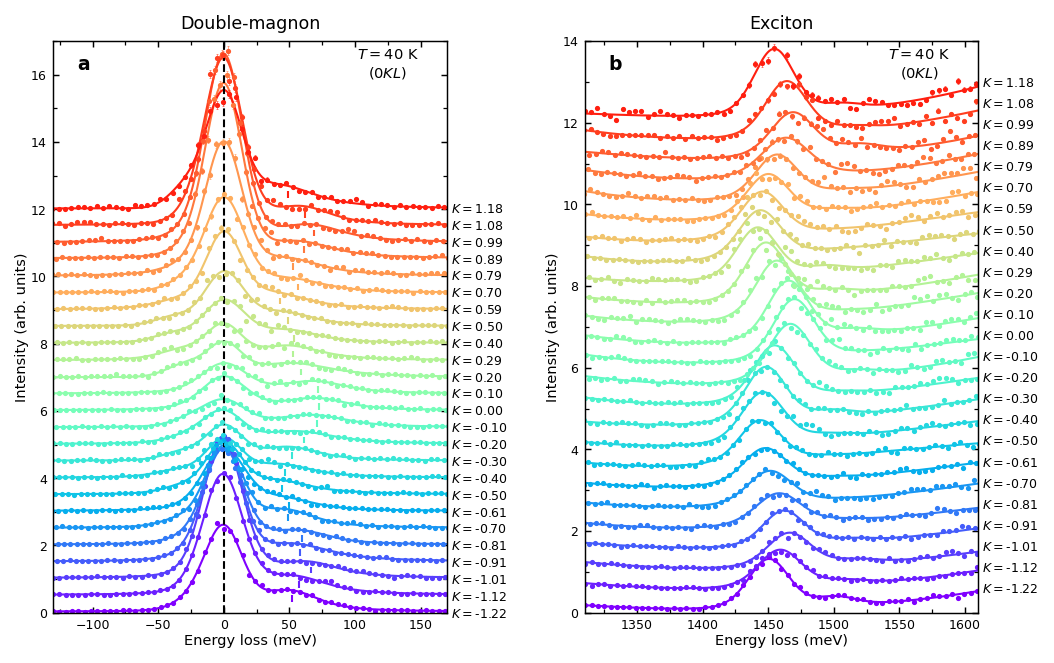

In [17]:
# plt.close('all')
fig, axs = plt.subplots(1, 2, dpi=dpi, figsize=(180*mm,110*mm), 
                        gridspec_kw=dict(wspace=0.35, left=0.07, right=0.94, bottom=0.07, top=0.95,
                                         width_ratios=[1, 1],)
                       )

alpha = 1
cmap = gen_cmap(26, cmap='rainbow')
yshift0 = 0.5
yshift1 = 0.5

Ks = spectra_0KL_data['K'][:]

for i, K in enumerate(Ks):
    x = spectra_0KL_data['spectra_K_{:.2f}'.format(K)]['eloss'][:]
    y = spectra_0KL_data['spectra_K_{:.2f}'.format(K)]['intensity'][:]
    yerr = spectra_0KL_data['spectra_K_{:.2f}'.format(K)]['error'][:]
    
    
    axs[0].errorbar(x, y+yshift0*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
    axs[1].errorbar(x, y+yshift1*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_0KL_fits['fits_spectra_K_{:.2f}'.format(K)]['elastic']['x'][:]
    y = spectra_0KL_fits['fits_spectra_K_{:.2f}'.format(K)]['elastic']['y'][:]
    axs[0].plot(x, y+yshift0*i,'-',color=cmap(i))
    
    x = spectra_0KL_fits['fits_spectra_K_{:.2f}'.format(K)]['exciton']['x'][:]
    y = spectra_0KL_fits['fits_spectra_K_{:.2f}'.format(K)]['exciton']['y'][:]
    axs[1].plot(x, y+yshift1*i,'-',color=cmap(i))

    
    # ticks at peak positions
    x = spectra_0KL_fits['ticks_x'][i]
    y = spectra_0KL_fits['ticks_y'][i]
    axs[0].vlines(x=x, ymin=y-0.35+yshift0*i, ymax=y-0.15+yshift0*i, ls='-', lw=1, color=cmap(i))
    
    
    # label
    axs[0].text(1.01, -0.008+0.0295*i, s='$K=${:.2f}'.format(Ks[i]), fontsize=6, transform=axs[0].transAxes, color='k')
    axs[1].text(1.01, 0.035+0.0369*i, s='$K=${:.2f}'.format(Ks[i]), fontsize=6, transform=axs[1].transAxes, color='k')

x = 0.85
y = 0.96
axs[0].text(x, y, s='$T= 40$ K\n($0KL$)', transform=axs[0].transAxes, color='k', va='center',ha='center')
axs[1].text(x, y, s='$T= 40$ K\n($0KL$)', transform=axs[1].transAxes, color='k', va='center',ha='center')

# title
axs[0].set_title('Double-magnon')
axs[1].set_title('Exciton')


# axis label
axs[0].set_xlabel('Energy loss (meV)')
axs[1].set_xlabel('Energy loss (meV)')
axs[0].set_ylabel('Intensity (arb. units)')
axs[1].set_ylabel('Intensity (arb. units)')

# axis range
axs[0].vlines(x=0, ymin=0, ymax=17, ls='--', colors='k',)
axs[0].set_ylim(0,17)
axs[0].set_xlim(-130,170)
axs[1].set_ylim(0,14)
axs[1].set_xlim(1310,1610)
axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[1].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# label
x = 0.06
y = 0.95
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')

fig.savefig('SI_0KL_LT.pdf', dpi=300)

# Extended Fig 3

In [18]:
spectra_H0L_HT_data = h5_file('data/RIXS_data/H0L_T190K_1dSpectra.hdf', 'r')
spectra_H0L_HT_fits = h5_file('data/RIXS_fits/H0L_190K_fits_spectra.hdf', 'r')

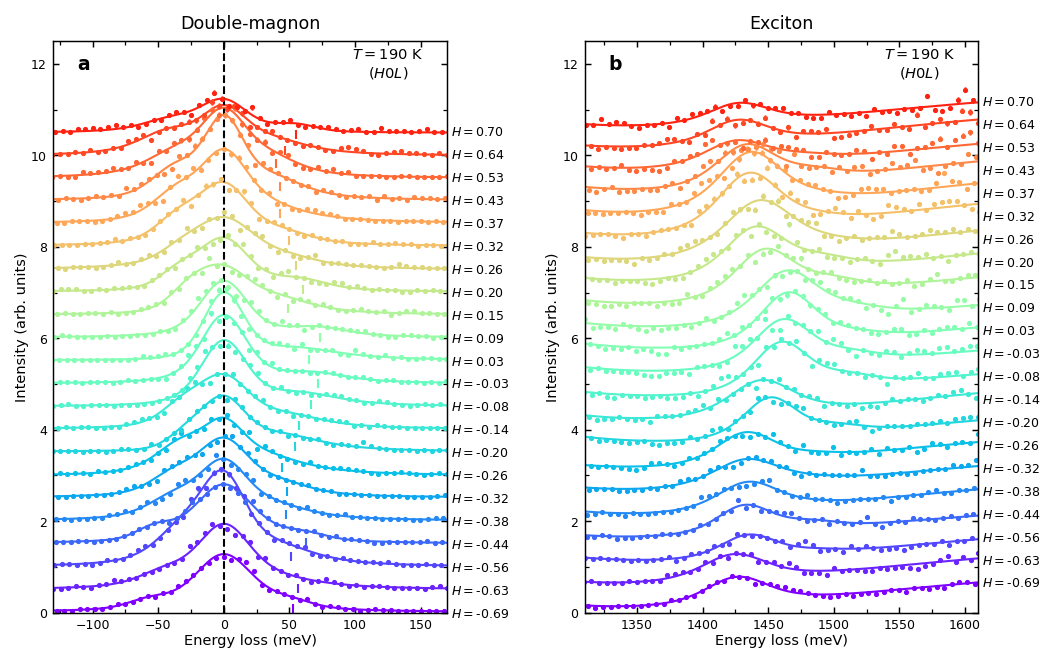

In [19]:
# plt.close('all')
fig, axs = plt.subplots(1, 2, dpi=dpi, figsize=(180*mm,110*mm), 
                        gridspec_kw=dict(wspace=0.35, left=0.07, right=0.94, bottom=0.07, top=0.95,
                                         width_ratios=[1, 1],)
                       )

alpha = 1
cmap = gen_cmap(23, cmap='rainbow')
yshift0 = 0.5
yshift1 = 0.5

Hs = spectra_H0L_HT_data['H'][:]

for i, H in enumerate(Hs):
    x = spectra_H0L_HT_data['spectra_H_{:.2f}'.format(H)]['eloss'][:]
    y = spectra_H0L_HT_data['spectra_H_{:.2f}'.format(H)]['intensity'][:]
    yerr = spectra_H0L_HT_data['spectra_H_{:.2f}'.format(H)]['error'][:]
      
    axs[0].errorbar(x, y+yshift0*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
    axs[1].errorbar(x, y+yshift1*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_H0L_HT_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['x'][:]
    y = spectra_H0L_HT_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['y'][:]
    axs[0].plot(x, y+yshift0*i,'-',color=cmap(i))
    
    x = spectra_H0L_HT_fits['fits_spectra_H_{:.2f}'.format(H)]['exciton']['x'][:]
    y = spectra_H0L_HT_fits['fits_spectra_H_{:.2f}'.format(H)]['exciton']['y'][:]
    axs[1].plot(x, y+yshift1*i,'-',color=cmap(i))

    
    # ticks at peak positions
    x = spectra_H0L_HT_fits['ticks_x'][i]
    y = spectra_H0L_HT_fits['ticks_y'][i]
    axs[0].vlines(x=x, ymin=y-0.35+yshift0*i, ymax=y-0.15+yshift0*i, ls='-', lw=1, color=cmap(i))
    
    
    # label
    axs[0].text(1.01, -0.008+0.0401*i, s='$H=${:.2f}'.format(Hs[i]), fontsize=6, transform=axs[0].transAxes, color='k')
    axs[1].text(1.01, 0.045+0.0401*i, s='$H=${:.2f}'.format(Hs[i]), fontsize=6, transform=axs[1].transAxes, color='k')

x = 0.85
y = 0.96
axs[0].text(x, y, s='$T= 190$ K\n($H0L$)', transform=axs[0].transAxes, color='k', va='center',ha='center')
axs[1].text(x, y, s='$T= 190$ K\n($H0L$)', transform=axs[1].transAxes, color='k', va='center',ha='center')

# title
axs[0].set_title('Double-magnon')
axs[1].set_title('Exciton')


# axis label
axs[0].set_xlabel('Energy loss (meV)')
axs[1].set_xlabel('Energy loss (meV)')
axs[0].set_ylabel('Intensity (arb. units)')
axs[1].set_ylabel('Intensity (arb. units)')

# axis range
axs[0].vlines(x=0, ymin=0, ymax=12.5, ls='--', colors='k',)
axs[0].set_ylim(0,12.5)
axs[0].set_xlim(-130,170)
axs[1].set_ylim(0,12.5)
axs[1].set_xlim(1310,1610)
axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[1].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# label
x = 0.06
y = 0.95
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')

fig.savefig('SI_H0L_HT.pdf', dpi=300)

# Extended Fig 4

In [20]:
spectra_0KL_Tdep1_data = h5_file('data/RIXS_data/0KL_Tdep1_1dSpectra.hdf', 'r')
spectra_0KL_Tdep1_fits = h5_file('data/RIXS_fits/0KL_Tdep1_fits_spectra.hdf', 'r')

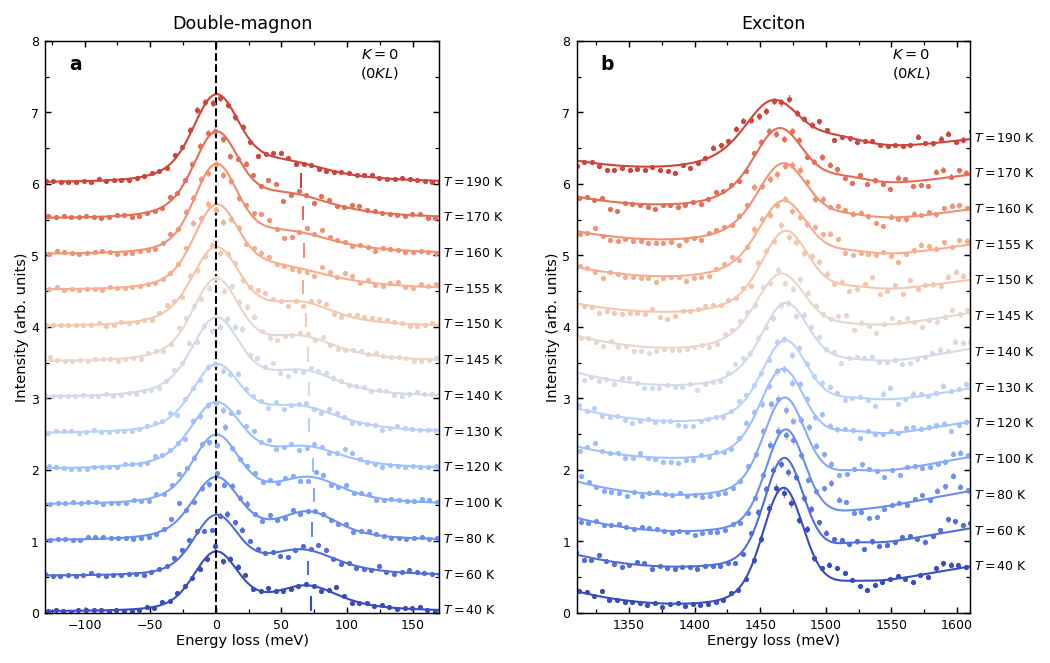

In [21]:
# plt.close('all')
fig, axs = plt.subplots(1, 2, dpi=dpi, figsize=(180*mm,110*mm), 
                        gridspec_kw=dict(wspace=0.35, left=0.07, right=0.94, bottom=0.07, top=0.95,
                                         width_ratios=[1, 1],)
                       )

alpha = 1
cmap = gen_cmap(14, cmap='coolwarm')
yshift0 = 0.5
yshift1 = 0.5

Ts = spectra_0KL_Tdep1_data['Temperature'][:]

for i, T in enumerate(Ts):
    x = spectra_0KL_Tdep1_data['spectra_T_{:.0f}'.format(T)]['eloss'][:]
    y = spectra_0KL_Tdep1_data['spectra_T_{:.0f}'.format(T)]['intensity'][:]
    yerr = spectra_0KL_Tdep1_data['spectra_T_{:.0f}'.format(T)]['error'][:]
    
    axs[0].errorbar(x, y+yshift0*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
    axs[1].errorbar(x, y+yshift1*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_0KL_Tdep1_fits['fits_spectra_T_{:.0f}'.format(T)]['elastic']['x'][:]
    y = spectra_0KL_Tdep1_fits['fits_spectra_T_{:.0f}'.format(T)]['elastic']['y'][:]
    axs[0].plot(x, y+yshift0*i,'-',color=cmap(i))
    
    x = spectra_0KL_Tdep1_fits['fits_spectra_T_{:.0f}'.format(T)]['exciton']['x'][:]
    y = spectra_0KL_Tdep1_fits['fits_spectra_T_{:.0f}'.format(T)]['exciton']['y'][:]
    axs[1].plot(x, y+yshift1*i,'-',color=cmap(i))

    
    # ticks at peak positions
    x = spectra_0KL_Tdep1_fits['ticks_x'][i]
    y = spectra_0KL_Tdep1_fits['ticks_y'][i]
    axs[0].vlines(x=x, ymin=y-0.35+yshift0*i, ymax=y-0.15+yshift0*i, ls='-', lw=1, color=cmap(i))
    
    
    # label
    axs[0].text(1.01, -0.002+0.0625*i, s='$T=${:.0f} K'.format(Ts[i]), fontsize=6, transform=axs[0].transAxes, color='k')
    axs[1].text(1.01, 0.075+0.0625*i, s='$T=${:.0f} K'.format(Ts[i]), fontsize=6, transform=axs[1].transAxes, color='k')

x = 0.85
y = 0.96
axs[0].text(x, y, s='$K= 0$\n($0KL$)', transform=axs[0].transAxes, color='k', va='center',ha='center')
axs[1].text(x, y, s='$K= 0$\n($0KL$)', transform=axs[1].transAxes, color='k', va='center',ha='center')

# title
axs[0].set_title('Double-magnon')
axs[1].set_title('Exciton')


# axis label
axs[0].set_xlabel('Energy loss (meV)')
axs[1].set_xlabel('Energy loss (meV)')
axs[0].set_ylabel('Intensity (arb. units)')
axs[1].set_ylabel('Intensity (arb. units)')

# axis range
axs[0].vlines(x=0, ymin=0, ymax=8, ls='--', colors='k',)
axs[0].set_ylim(0,8)
axs[0].set_xlim(-130,170)
axs[1].set_ylim(0,8)
axs[1].set_xlim(1310,1610)
axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[1].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# label
x = 0.06
y = 0.95
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')

fig.savefig('SI_Tdep.pdf', dpi=300)

# Extended Fig 5

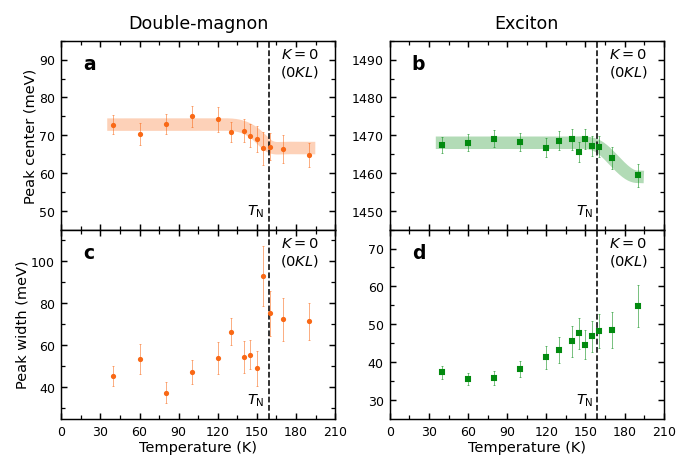

In [22]:
# plt.close('all')
fig, axs = plt.subplots(2, 2, dpi=dpi, figsize=(120*mm,80*mm), sharex=True,
                        gridspec_kw=dict(wspace=0.2, hspace=0, top=0.9, left=0.1, right=0.95, bottom=0.1,
                                         width_ratios=[1, 1],height_ratios=[1, 1, ])
                       )
x,y,yerr = np.loadtxt('data/RIXS_fits/0KL_Tdep_fits_2magnon_center.txt', delimiter='\t', comments='# ', unpack='True')
axs[0,0].errorbar(x, y, yerr=np.sqrt(yerr**2 + elasticLineError**2),marker=marker_m, color=color_m, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick)

x,y,yerr = np.loadtxt('data/RIXS_fits/0KL_Tdep_fits_exciton_center.txt', delimiter='\t', comments='# ', unpack='True')
axs[0,1].errorbar(x, y, yerr=np.sqrt(yerr**2 + elasticLineError**2),marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick)

x,y,yerr = np.loadtxt('data/RIXS_fits/0KL_Tdep_fits_2magnon_fwhm.txt', delimiter='\t', comments='# ', unpack='True')
axs[1,0].errorbar(x, y, yerr=yerr,marker=marker_m, color=color_m, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick)

x,y,yerr = np.loadtxt('data/RIXS_fits/0KL_Tdep_fits_exciton_fwhm.txt', delimiter='\t', comments='# ', unpack='True')
axs[1,1].errorbar(x, y, yerr=yerr,marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick)


# guide to the eye
x = np.array([  40,   80,   90,  100,  120,  150,  160,  170,  180,  185, 190])
y = np.array([72.8, 72.8, 72.8, 72.8, 72.8,   70,   67, 66.6, 66.6, 66.6, 66.6,])
interp_model = sp.interpolate.interp1d(x, y, kind='cubic')
x_ = np.linspace(x.min(),x.max(), 1000)
y_ = interp_model(x_)
axs[0,0].plot(x_, y_, '-', lw=6, color=color_m, alpha=0.3, zorder=-1)

x = np.array([  40,   80,  120,  130,  140,  150,  160,  170,  190])
y = np.array([1468, 1468, 1468, 1468, 1468, 1468, 1467, 1464, 1459,])
interp_model = sp.interpolate.interp1d(x, y, kind='cubic')
x_ = np.linspace(x.min(),x.max(), 1000)
y_ = interp_model(x_)
axs[0,1].plot(x_, y_, '-', lw=6, color=color_e, alpha=0.3, zorder=-1)
    

# text
for ax in axs.flatten():
    ax.text(0.71,0.1, s=r'$T_\mathrm{N}$', transform=ax.transAxes, color='k', va='center',ha='center')
    ax.text(0.87, 0.88, s='$K= 0$\n($0KL$)', transform=ax.transAxes, color='k', va='center',ha='center')


# tick 
axs[0,0].set_xticks(np.arange(0,211,30,))
axs[0,0].set_yticks(np.arange(40,120,10))
axs[0,1].set_yticks(np.arange(1420,1520,10))
axs[1,0].set_yticks(np.arange(0,116,20))
axs[1,1].set_yticks(np.arange(0,116,10))
for ax in axs.flatten():
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))


# axis label
axs[1,0].set_xlabel('Temperature (K)')
axs[1,1].set_xlabel('Temperature (K)')
axs[0,0].set_ylabel('Peak center (meV)')
axs[1,0].set_ylabel('Peak width (meV)')


# title
axs[0,0].set_title('Double-magnon')
axs[0,1].set_title('Exciton')


# axis range
axs[0,0].set_xlim(0,210)
axs[0,0].set_ylim(45,45+50)
axs[0,1].set_ylim(1445,1445+50)
axs[1,0].set_ylim(25,25+90)
axs[1,1].set_ylim(25,25+50)


for ax in axs.flatten():
    ymin,ymax = ax.get_ylim()
    ax.vlines([159], ymin=ymin, ymax=ymax, colors='k', linestyles='--', lw=0.75)
    
# label
x = 0.08
y = 0.85
axs[0,0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,0].transAxes, color='k')
axs[0,1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,1].transAxes, color='k')
axs[1,0].text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,0].transAxes, color='k')
axs[1,1].text(x=x, y=y, s='d', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,1].transAxes, color='k')


fig.savefig('SI_Tdep_fits.pdf', dpi=300)

# Extended Fig 6

In [23]:
spectra_Edep_data = h5_file('data/RIXS_data/Edep_1dSpectra.hdf', 'r')
spectra_Edep_fits = h5_file('data/RIXS_fits/Edep_fits_spectra.hdf', 'r')

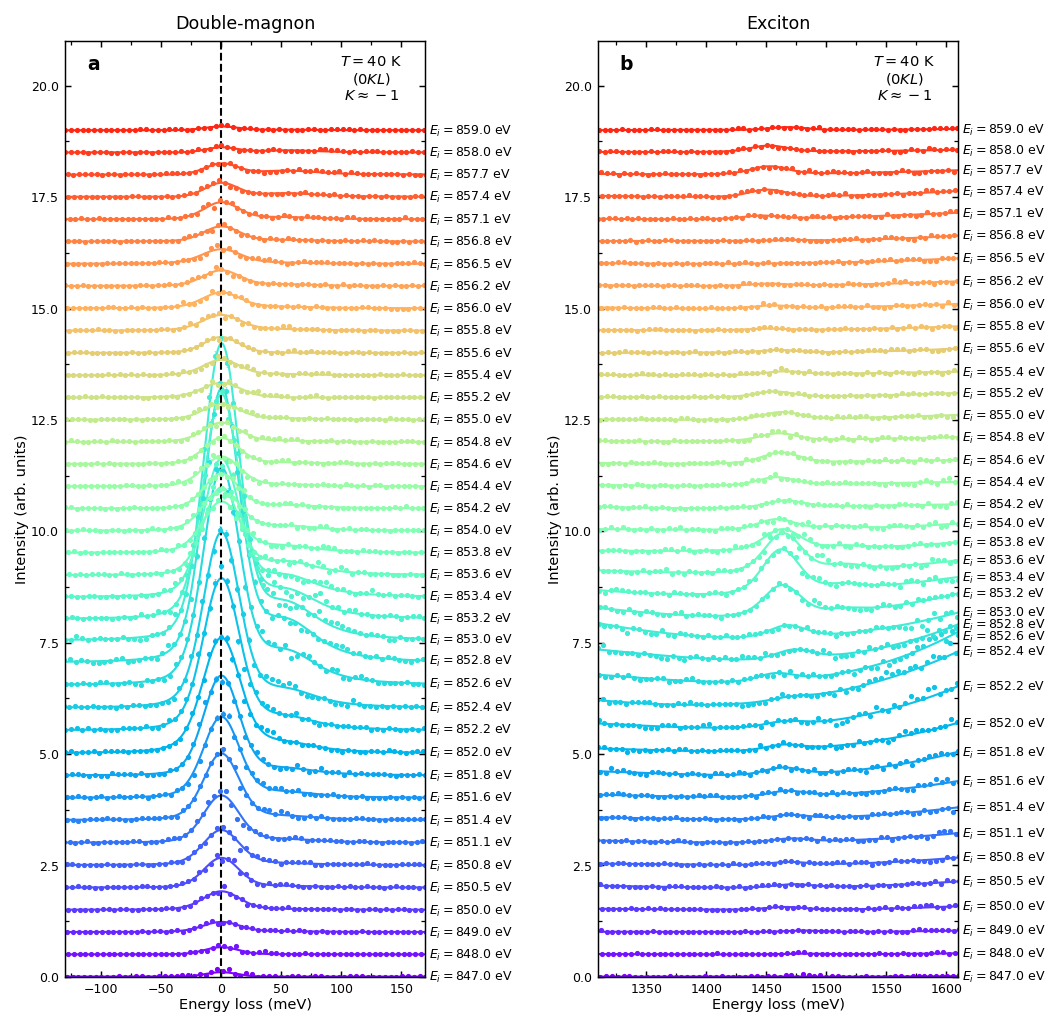

In [24]:
# plt.close('all')
fig, axs = plt.subplots(1, 2, dpi=dpi, figsize=(180*mm,180*mm), 
                        gridspec_kw=dict(wspace=0.48, left=0.07, right=0.91, bottom=0.07, top=0.95,
                                         width_ratios=[1, 1],)
                       )

alpha = 1
cmap = gen_cmap(41, cmap='rainbow')
yshift0 = 0.5
yshift1 = 0.5

Es = spectra_Edep_data['Ei'][:]

for i, E in enumerate(Es):
    x = spectra_Edep_data['spectra_Ei_{:.1f}'.format(E)]['eloss'][:]
    y = spectra_Edep_data['spectra_Ei_{:.1f}'.format(E)]['intensity'][:]
    yerr = spectra_Edep_data['spectra_Ei_{:.1f}'.format(E)]['error'][:]
    
    
    axs[0].errorbar(x, y+yshift0*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
    axs[1].errorbar(x, y+yshift1*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results 
    x = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['elastic']['x'][:]
    y = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['elastic']['y'][:]
    axs[0].plot(x, y+yshift0*i,'-',color=cmap(i))
    
    x = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['exciton']['x'][:]
    y = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['exciton']['y'][:]
    axs[1].plot(x, y+yshift1*i,'-',color=cmap(i))

   
    # label
    x = 173
    y = spectra_Edep_fits['labels_elastic'][i]
    axs[0].text(x, y-0.1+yshift1*i, s='$E_i=${:.1f} eV'.format(E), fontsize=6, color='k')
    x = 1613
    y = spectra_Edep_fits['labels_exciton'][i]
    axs[1].text(x, y-0.1+yshift1*i, s='$E_i=${:.1f} eV'.format(E), fontsize=6, color='k')

x = 0.85
y = 0.96
axs[0].text(x, y, s='$T= 40$ K\n'+'($0KL$)\n'+r'$K\approx-1$', transform=axs[0].transAxes, color='k', va='center',ha='center')
axs[1].text(x, y, s='$T= 40$ K\n'+'($0KL$)\n'+r'$K\approx-1$', transform=axs[1].transAxes, color='k', va='center',ha='center')

# title
axs[0].set_title('Double-magnon')
axs[1].set_title('Exciton')


# axis label
axs[0].set_xlabel('Energy loss (meV)')
axs[1].set_xlabel('Energy loss (meV)')
axs[0].set_ylabel('Intensity (arb. units)')
axs[1].set_ylabel('Intensity (arb. units)')

# axis range
axs[0].vlines(x=0, ymin=0, ymax=21, ls='--', colors='k',)
axs[0].set_ylim(0,21)
axs[0].set_xlim(-130,170)
axs[1].set_ylim(0,21)
axs[1].set_xlim(1310,1610)
axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[1].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# label
x = 0.06
y = 0.97
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')

fig.savefig('SI_Edep.pdf', dpi=300)

# Supplementary Fig 1

In [25]:
Single_site_model = h5_file('data/edrixs/Single_site_model.hdf', 'r')
xas = h5_file('data/xas_data.hdf', 'r')

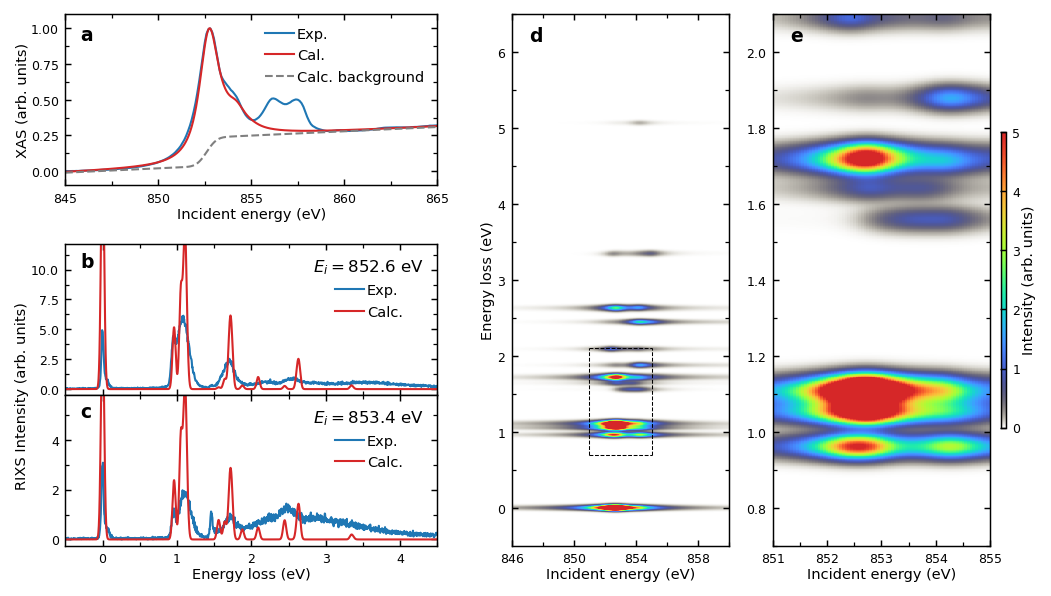

In [26]:
fig = plt.figure(dpi=dpi, figsize=(180*mm,100*mm))
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.4, top=0.99, bottom=0.7, wspace=0, hspace=0)
gs2 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.4, top=0.6, bottom=0.09, wspace=0, hspace=0,)
gs3 = fig.add_gridspec(nrows=1, ncols=2, left=0.47, right=0.92, top=0.99, bottom=0.09, wspace=0.2, hspace=0)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2] + [fig.add_subplot(gs) for gs in gs3]
cax = fig.add_axes([0.93,0.09+0.2,0.005,0.99-0.09-0.4]) # axis for colorbar
colormap=turbo_w()

axs[0].plot(xas['energy'][:], normalize(xas['TFY'][:]), color='C0', ls='-', label='Exp.')
axs[0].plot(Single_site_model['xas']['omega'][:], Single_site_model['xas']['LH'][:]+Single_site_model['xas']['bg'][:], color='C3', ls='-', label='Cal.')
axs[0].plot(Single_site_model['xas']['omega'][:], Single_site_model['xas']['bg'][:], color='gray', ls='--', label='Calc. background')

omega = 852.6
chooseE = np.argmin(abs(Emap_data['Ei'][:]-omega))
axs[1].plot(Emap_data['eloss'][:], Emap_data['intensity'][chooseE,:], '-', color='C0', label='Exp.')
chooseE = np.argmin(abs(Single_site_model['rixs']['omega'][:]-omega))
axs[1].plot(Single_site_model['rixs']['eloss'][:], Single_site_model['rixs']['LH'][chooseE,:]*scale, '-', color='C3', label='Calc.')

omega = 853.4
chooseE = np.argmin(abs(Emap_data['Ei'][:]-omega))
axs[2].plot(Emap_data['eloss'][:], Emap_data['intensity'][chooseE,:], '-', color='C0', label='Exp.')
chooseE = np.argmin(abs(Single_site_model['rixs']['omega'][:]-omega))
axs[2].plot(Single_site_model['rixs']['eloss'][:], Single_site_model['rixs']['LH'][chooseE,:]*scale, '-', color='C3', label='Calc.')

ims = [0,0]
ims[0] = plot2d(ax=axs[3], x=Single_site_model['rixs']['omega'][:], y=Single_site_model['rixs']['eloss'][:], Int=Single_site_model['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[4], x=Single_site_model['rixs']['omega'][:], y=Single_site_model['rixs']['eloss'][:], Int=Single_site_model['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)


# axis range
axs[0].set_xticks(np.arange(845,865.1,5))
axs[0].set_xlim(845,865)
axs[0].set_ylim(-0.1,1.1)

axs[1].set_xlim(-0.5, 4.5)
axs[1].set_ylim(-0.5, 12.1)
axs[2].set_xlim(-0.5, 4.5)
axs[2].set_ylim(-0.25, 5.8)

axs[3].set_xticks(np.arange(846,860.1,4))
axs[3].set_xlim(846,860)
axs[3].set_ylim(-0.5,6.5)
axs[4].set_xlim(851,855)
axs[4].set_ylim(0.7,2.1)

# dashed box
axs[3].plot([851,851], [0.7,2.1], 'k--', lw=0.5)
axs[3].plot([855,855], [0.7,2.1], 'k--', lw=0.5)
axs[3].plot([851,855], [0.7,0.7], 'k--', lw=0.5)
axs[3].plot([851,855], [2.1,2.1], 'k--', lw=0.5)


for ax in axs:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
# axis label
axs[0].set_xlabel('Incident energy (eV)')
axs[0].set_ylabel('XAS (arb. units)')

axs[1].set_ylabel('RIXS Intensity (arb. units)', y=0, )
axs[2].set_xlabel('Energy loss (eV)')


axs[3].set_ylabel('Energy loss (eV)')
axs[3].set_xlabel('Incident energy (eV)')
axs[4].set_xlabel('Incident energy (eV)')


# colorbar
for im in ims:
    im.set_clim(0, 5)
cbar = plt.colorbar(ims[1], cax=cax)
cbar.set_ticks(np.arange(0, 5.1, 1))
cbar.set_label('Intensity (arb. units)')

# legend
for ax in axs[0:1]:
    ax.legend()
axs[1].legend(title='$E_i = 852.6$ eV', title_fontsize=8, loc='upper right')
axs[2].legend(title='$E_i = 853.4$ eV', title_fontsize=8, loc='upper right')

# label
x = 0.04
y = 0.85
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')
axs[2].text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[2].transAxes, color='k')
x = 0.08
y = 0.95
axs[3].text(x=x, y=y, s='d', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[3].transAxes, color='k')
axs[4].text(x=x, y=y, s='e', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[4].transAxes, color='k')


fig.savefig('SI_ED_atomic_model.pdf', dpi=300)



# Supplementary Fig 2

In [27]:
Cluster_model = h5_file('data/edrixs/Cluster_model.hdf', 'r')


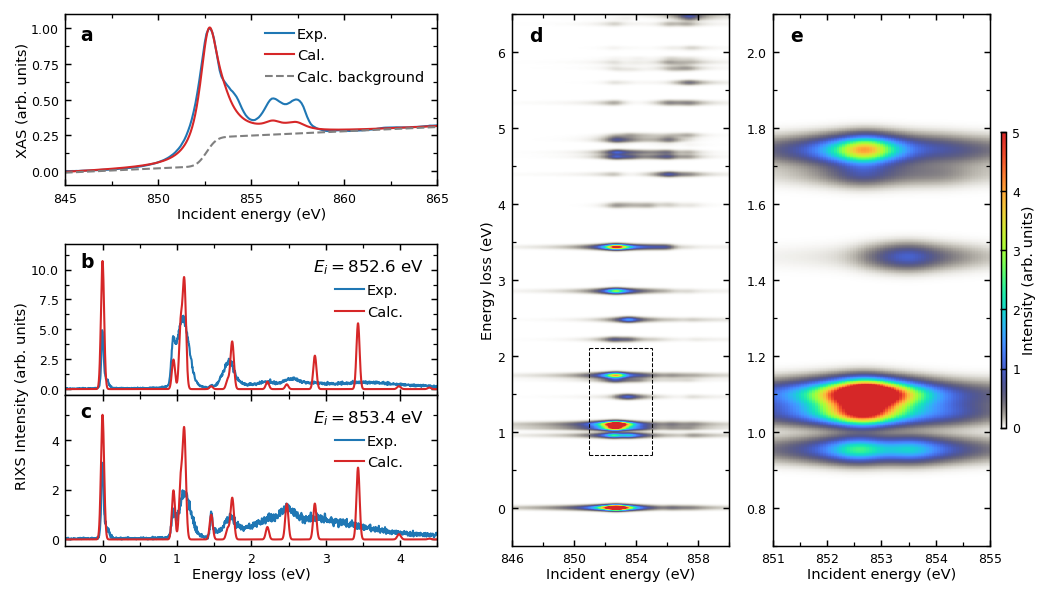

In [28]:
fig = plt.figure(dpi=dpi, figsize=(180*mm,100*mm))
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.4, top=0.99, bottom=0.7, wspace=0, hspace=0)
gs2 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.4, top=0.6, bottom=0.09, wspace=0, hspace=0,)
gs3 = fig.add_gridspec(nrows=1, ncols=2, left=0.47, right=0.92, top=0.99, bottom=0.09, wspace=0.2, hspace=0)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2] + [fig.add_subplot(gs) for gs in gs3]
cax = fig.add_axes([0.93,0.09+0.2,0.005,0.99-0.09-0.4]) # axis for colorbar
colormap=turbo_w()

axs[0].plot(xas['energy'][:], normalize(xas['TFY'][:]), color='C0', ls='-', label='Exp.')
axs[0].plot(Cluster_model['xas']['omega'][:], Cluster_model['xas']['LH'][:]+Cluster_model['xas']['bg'][:], color='C3', ls='-', label='Cal.')
axs[0].plot(Cluster_model['xas']['omega'][:], Cluster_model['xas']['bg'][:], color='gray', ls='--', label='Calc. background')

omega = 852.6
chooseE = np.argmin(abs(Emap_data['Ei'][:]-omega))
axs[1].plot(Emap_data['eloss'][:], Emap_data['intensity'][chooseE,:], '-', color='C0', label='Exp.')
chooseE = np.argmin(abs(Cluster_model['rixs']['omega'][:]-omega))
axs[1].plot(Cluster_model['rixs']['eloss'][:], Cluster_model['rixs']['LH'][chooseE,:]*scale, '-', color='C3', label='Calc.')

omega = 853.4
chooseE = np.argmin(abs(Emap_data['Ei'][:]-omega))
axs[2].plot(Emap_data['eloss'][:], Emap_data['intensity'][chooseE,:], '-', color='C0', label='Exp.')
chooseE = np.argmin(abs(Cluster_model['rixs']['omega'][:]-omega))
axs[2].plot(Cluster_model['rixs']['eloss'][:], Cluster_model['rixs']['LH'][chooseE,:]*scale, '-', color='C3', label='Calc.')

ims = [0,0]
ims[0] = plot2d(ax=axs[3], x=Cluster_model['rixs']['omega'][:], y=Cluster_model['rixs']['eloss'][:], Int=Cluster_model['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[4], x=Cluster_model['rixs']['omega'][:], y=Cluster_model['rixs']['eloss'][:], Int=Cluster_model['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)


# axis range
axs[0].set_xticks(np.arange(845,865.1,5))
axs[0].set_xlim(845,865)
axs[0].set_ylim(-0.1,1.1)

axs[1].set_xlim(-0.5, 4.5)
axs[1].set_ylim(-0.5, 12.1)
axs[2].set_xlim(-0.5, 4.5)
axs[2].set_ylim(-0.25, 5.8)

axs[3].set_xticks(np.arange(846,860.1,4))
axs[3].set_xlim(846,860)
axs[3].set_ylim(-0.5,6.5)
axs[4].set_xlim(851,855)
axs[4].set_ylim(0.7,2.1)

# dashed box
axs[3].plot([851,851], [0.7,2.1], 'k--', lw=0.5)
axs[3].plot([855,855], [0.7,2.1], 'k--', lw=0.5)
axs[3].plot([851,855], [0.7,0.7], 'k--', lw=0.5)
axs[3].plot([851,855], [2.1,2.1], 'k--', lw=0.5)


for ax in axs:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
# axis label
axs[0].set_xlabel('Incident energy (eV)')
axs[0].set_ylabel('XAS (arb. units)')

axs[1].set_ylabel('RIXS Intensity (arb. units)', y=0, )
axs[2].set_xlabel('Energy loss (eV)')


axs[3].set_ylabel('Energy loss (eV)')
axs[3].set_xlabel('Incident energy (eV)')
axs[4].set_xlabel('Incident energy (eV)')


# colorbar
for im in ims:
    im.set_clim(0, 5)
cbar = plt.colorbar(ims[1], cax=cax)
cbar.set_ticks(np.arange(0, 5.1, 1))
cbar.set_label('Intensity (arb. units)')

# legend
for ax in axs[0:1]:
    ax.legend()
axs[1].legend(title='$E_i = 852.6$ eV', title_fontsize=8, loc='upper right')
axs[2].legend(title='$E_i = 853.4$ eV', title_fontsize=8, loc='upper right')

# label
x = 0.04
y = 0.85
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')
axs[2].text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[2].transAxes, color='k')
x = 0.08
y = 0.95
axs[3].text(x=x, y=y, s='d', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[3].transAxes, color='k')
axs[4].text(x=x, y=y, s='e', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[4].transAxes, color='k')


fig.savefig('SI_ED_NiS6.pdf', dpi=300)



# Supplementary Fig 3

In [29]:
AIM_model = h5_file('data/edrixs/AIM_model.hdf', 'r')


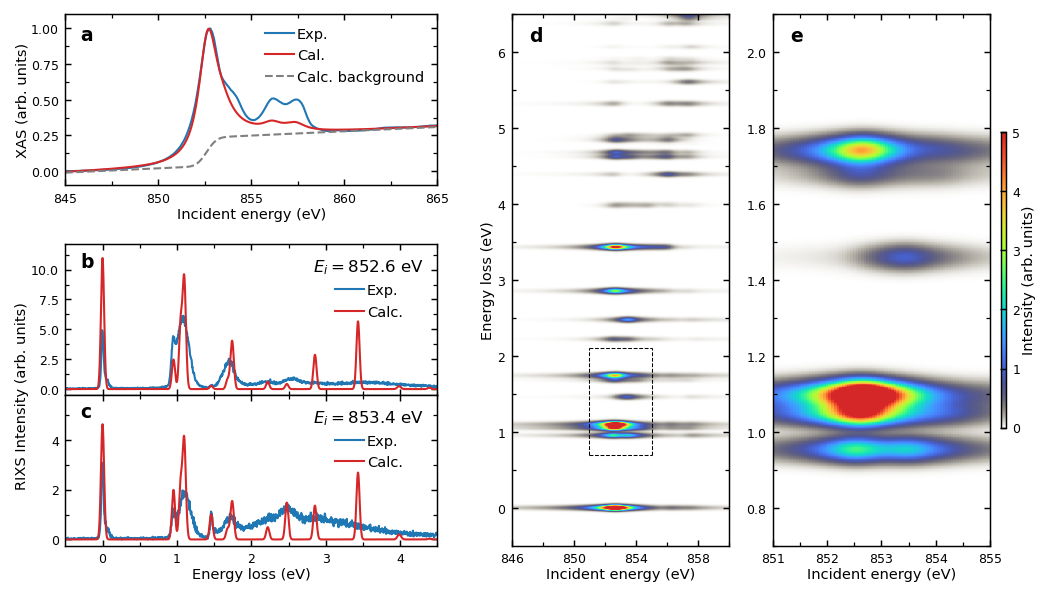

In [30]:
fig = plt.figure(dpi=dpi, figsize=(180*mm,100*mm))
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.4, top=0.99, bottom=0.7, wspace=0, hspace=0)
gs2 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.4, top=0.6, bottom=0.09, wspace=0, hspace=0,)
gs3 = fig.add_gridspec(nrows=1, ncols=2, left=0.47, right=0.92, top=0.99, bottom=0.09, wspace=0.2, hspace=0)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2] + [fig.add_subplot(gs) for gs in gs3]
cax = fig.add_axes([0.93,0.09+0.2,0.005,0.99-0.09-0.4]) # axis for colorbar
colormap=turbo_w()

axs[0].plot(xas['energy'][:], normalize(xas['TFY'][:]), color='C0', ls='-', label='Exp.')
axs[0].plot(AIM_model['xas']['omega'][:], AIM_model['xas']['LH'][:]+AIM_model['xas']['bg'][:], color='C3', ls='-', label='Cal.')
axs[0].plot(AIM_model['xas']['omega'][:], AIM_model['xas']['bg'][:], color='gray', ls='--', label='Calc. background')

omega = 852.6
chooseE = np.argmin(abs(Emap_data['Ei'][:]-omega))
axs[1].plot(Emap_data['eloss'][:], Emap_data['intensity'][chooseE,:], '-', color='C0', label='Exp.')
chooseE = np.argmin(abs(AIM_model['rixs']['omega'][:]-omega))
axs[1].plot(AIM_model['rixs']['eloss'][:], AIM_model['rixs']['LH'][chooseE,:]*scale, '-', color='C3', label='Calc.')

omega = 853.4
chooseE = np.argmin(abs(Emap_data['Ei'][:]-omega))
axs[2].plot(Emap_data['eloss'][:], Emap_data['intensity'][chooseE,:], '-', color='C0', label='Exp.')
chooseE = np.argmin(abs(AIM_model['rixs']['omega'][:]-omega))
axs[2].plot(AIM_model['rixs']['eloss'][:], AIM_model['rixs']['LH'][chooseE,:]*scale, '-', color='C3', label='Calc.')

ims = [0,0]
ims[0] = plot2d(ax=axs[3], x=AIM_model['rixs']['omega'][:], y=AIM_model['rixs']['eloss'][:], Int=AIM_model['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[4], x=AIM_model['rixs']['omega'][:], y=AIM_model['rixs']['eloss'][:], Int=AIM_model['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)


# axis range
axs[0].set_xticks(np.arange(845,865.1,5))
axs[0].set_xlim(845,865)
axs[0].set_ylim(-0.1,1.1)

axs[1].set_xlim(-0.5, 4.5)
axs[1].set_ylim(-0.5, 12.1)
axs[2].set_xlim(-0.5, 4.5)
axs[2].set_ylim(-0.25, 5.8)

axs[3].set_xticks(np.arange(846,860.1,4))
axs[3].set_xlim(846,860)
axs[3].set_ylim(-0.5,6.5)
axs[4].set_xlim(851,855)
axs[4].set_ylim(0.7,2.1)

# dashed box
axs[3].plot([851,851], [0.7,2.1], 'k--', lw=0.5)
axs[3].plot([855,855], [0.7,2.1], 'k--', lw=0.5)
axs[3].plot([851,855], [0.7,0.7], 'k--', lw=0.5)
axs[3].plot([851,855], [2.1,2.1], 'k--', lw=0.5)


for ax in axs:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
# axis label
axs[0].set_xlabel('Incident energy (eV)')
axs[0].set_ylabel('XAS (arb. units)')

axs[1].set_ylabel('RIXS Intensity (arb. units)', y=0, )
axs[2].set_xlabel('Energy loss (eV)')


axs[3].set_ylabel('Energy loss (eV)')
axs[3].set_xlabel('Incident energy (eV)')
axs[4].set_xlabel('Incident energy (eV)')


# colorbar
for im in ims:
    im.set_clim(0, 5)
cbar = plt.colorbar(ims[1], cax=cax)
cbar.set_ticks(np.arange(0, 5.1, 1))
cbar.set_label('Intensity (arb. units)')

# legend
for ax in axs[0:1]:
    ax.legend()
axs[1].legend(title='$E_i = 852.6$ eV', title_fontsize=8, loc='upper right')
axs[2].legend(title='$E_i = 853.4$ eV', title_fontsize=8, loc='upper right')

# label
x = 0.04
y = 0.85
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')
axs[2].text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[2].transAxes, color='k')
x = 0.08
y = 0.95
axs[3].text(x=x, y=y, s='d', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[3].transAxes, color='k')
axs[4].text(x=x, y=y, s='e', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[4].transAxes, color='k')


fig.savefig('SI_ED_AIM.pdf', dpi=300)



# Supplementary Fig 4

In [31]:
Nature_model1 = h5_file('data/edrixs/Nature_model1.hdf', 'r')


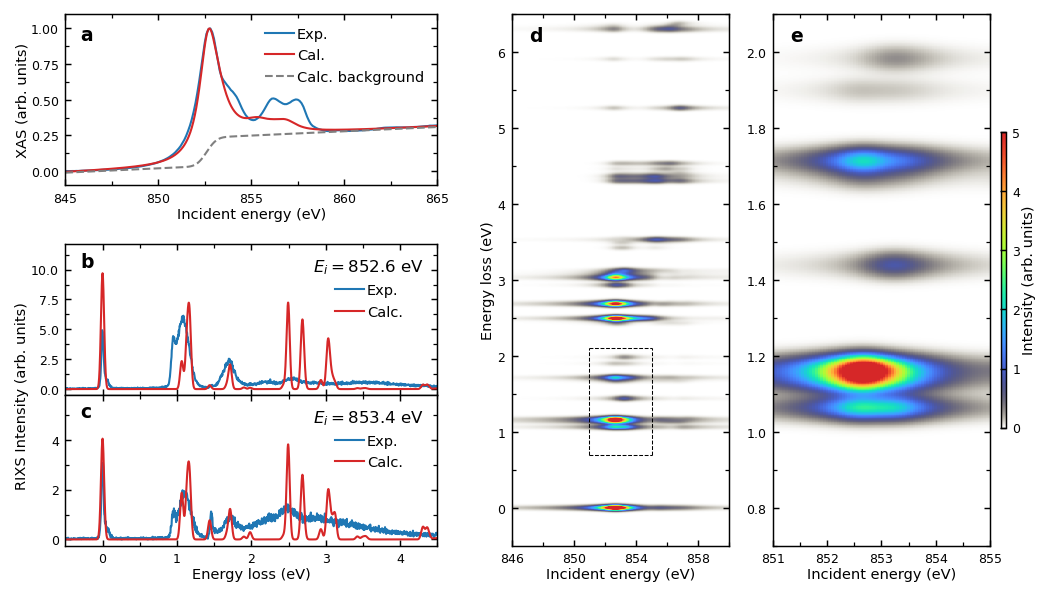

In [56]:
fig = plt.figure(dpi=dpi, figsize=(180*mm,100*mm))
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.4, top=0.99, bottom=0.7, wspace=0, hspace=0)
gs2 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.4, top=0.6, bottom=0.09, wspace=0, hspace=0,)
gs3 = fig.add_gridspec(nrows=1, ncols=2, left=0.47, right=0.92, top=0.99, bottom=0.09, wspace=0.2, hspace=0)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2] + [fig.add_subplot(gs) for gs in gs3]
cax = fig.add_axes([0.93,0.09+0.2,0.005,0.99-0.09-0.4]) # axis for colorbar
colormap=turbo_w()

axs[0].plot(xas['energy'][:], normalize(xas['TFY'][:]), color='C0', ls='-', label='Exp.')
axs[0].plot(Nature_model1['xas']['omega'][:], Nature_model1['xas']['LH'][:]+Nature_model1['xas']['bg'][:], color='C3', ls='-', label='Cal.')
axs[0].plot(Nature_model1['xas']['omega'][:], Nature_model1['xas']['bg'][:], color='gray', ls='--', label='Calc. background')

omega = 852.6
chooseE = np.argmin(abs(Emap_data['Ei'][:]-omega))
axs[1].plot(Emap_data['eloss'][:], Emap_data['intensity'][chooseE,:], '-', color='C0', label='Exp.')
chooseE = np.argmin(abs(Nature_model1['rixs']['omega'][:]-omega))
axs[1].plot(Nature_model1['rixs']['eloss'][:], Nature_model1['rixs']['LH'][chooseE,:]*scale, '-', color='C3', label='Calc.')

omega = 853.4
chooseE = np.argmin(abs(Emap_data['Ei'][:]-omega))
axs[2].plot(Emap_data['eloss'][:], Emap_data['intensity'][chooseE,:], '-', color='C0', label='Exp.')
chooseE = np.argmin(abs(Nature_model1['rixs']['omega'][:]-omega))
axs[2].plot(Nature_model1['rixs']['eloss'][:], Nature_model1['rixs']['LH'][chooseE,:]*scale, '-', color='C3', label='Calc.')

ims = [0,0]
ims[0] = plot2d(ax=axs[3], x=Nature_model1['rixs']['omega'][:], y=Nature_model1['rixs']['eloss'][:], Int=Nature_model1['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[4], x=Nature_model1['rixs']['omega'][:], y=Nature_model1['rixs']['eloss'][:], Int=Nature_model1['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)


# axis range
axs[0].set_xticks(np.arange(845,865.1,5))
axs[0].set_xlim(845,865)
axs[0].set_ylim(-0.1,1.1)

axs[1].set_xlim(-0.5, 4.5)
axs[1].set_ylim(-0.5, 12.1)
axs[2].set_xlim(-0.5, 4.5)
axs[2].set_ylim(-0.25, 5.8)

axs[3].set_xticks(np.arange(846,860.1,4))
axs[3].set_xlim(846,860)
axs[3].set_ylim(-0.5,6.5)
axs[4].set_xlim(851,855)
axs[4].set_ylim(0.7,2.1)

# dashed box
axs[3].plot([851,851], [0.7,2.1], 'k--', lw=0.5)
axs[3].plot([855,855], [0.7,2.1], 'k--', lw=0.5)
axs[3].plot([851,855], [0.7,0.7], 'k--', lw=0.5)
axs[3].plot([851,855], [2.1,2.1], 'k--', lw=0.5)


for ax in axs:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
# axis label
axs[0].set_xlabel('Incident energy (eV)')
axs[0].set_ylabel('XAS (arb. units)')

axs[1].set_ylabel('RIXS Intensity (arb. units)', y=0, )
axs[2].set_xlabel('Energy loss (eV)')


axs[3].set_ylabel('Energy loss (eV)')
axs[3].set_xlabel('Incident energy (eV)')
axs[4].set_xlabel('Incident energy (eV)')


# colorbar
for im in ims:
    im.set_clim(0, 5)
cbar = plt.colorbar(ims[1], cax=cax)
cbar.set_ticks(np.arange(0, 5.1, 1))
cbar.set_label('Intensity (arb. units)')

# legend
for ax in axs[0:1]:
    ax.legend()
axs[1].legend(title='$E_i = 852.6$ eV', title_fontsize=8, loc='upper right')
axs[2].legend(title='$E_i = 853.4$ eV', title_fontsize=8, loc='upper right')

# label
x = 0.04
y = 0.85
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')
axs[2].text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[2].transAxes, color='k')
x = 0.08
y = 0.95
axs[3].text(x=x, y=y, s='d', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[3].transAxes, color='k')
axs[4].text(x=x, y=y, s='e', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[4].transAxes, color='k')


fig.savefig('SI_ED_NiS6_Nature.pdf', dpi=300)



# Supplementary Fig 5

In [33]:
Nature_model2 = h5_file('data/edrixs/Nature_model2.hdf', 'r')

cm_data = np.loadtxt('parula.txt')
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

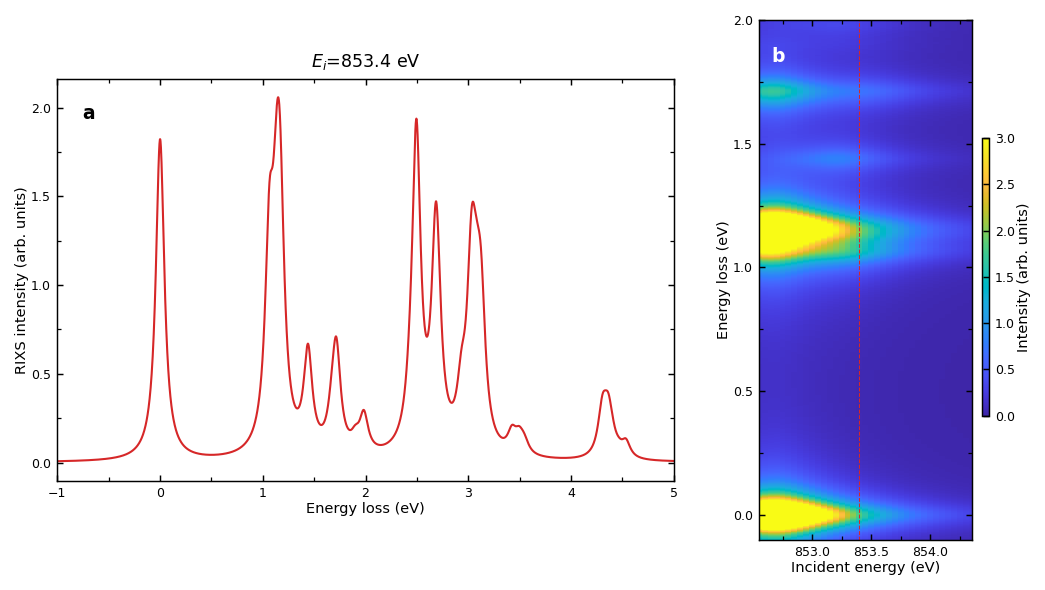

In [34]:
fig = plt.figure(dpi=dpi, figsize=(180*mm,100*mm))
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.07, right=0.65, top=0.87, bottom=0.19, wspace=0, hspace=0)
gs2 = fig.add_gridspec(nrows=1, ncols=1, left=0.73, right=0.93, top=0.97, bottom=0.09, wspace=0, hspace=0)
gs3 = fig.add_gridspec(nrows=1, ncols=1, left=0.94, right=0.946, top=0.77, bottom=0.3, wspace=0, hspace=0)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2] + [fig.add_subplot(gs) for gs in gs3]

omega = 853.4
chooseE = np.argmin(abs(Nature_model2['omega'][:]-omega))
axs[0].plot(Nature_model2['eloss'][:], Nature_model2['LH'][chooseE,:]*scale, '-', color='C3', lw=1)

im = plot2d(ax=axs[1], x=Nature_model2['omega'][:], y=Nature_model2['eloss'][:], Int=Nature_model2['LH'][:]*scale, colormap=parula_map, rasterized=True)

im.set_clim(0, 3)
cbar = plt.colorbar(im, cax=axs[2])
cbar.set_ticks(np.arange(0.,3.1,0.5))
cbar.set_label('Intensity (arb. units)')

axs[1].axvline(x=omega, color='C3', ls='--', lw=0.5)


axs[0].set_xlim(-1,5)
axs[0].set_xticks(np.arange(-1,5.1,1))
axs[0].set_xlabel('Energy loss (eV)')
axs[0].set_ylabel('RIXS intensity (arb. units)')
axs[0].set_title('$E_i$=853.4 eV')
axs[1].set_xlim(852.55,854.35)
axs[1].set_ylim(-0.1,2)
axs[1].set_yticks(np.arange(0,2.1,0.5))
axs[1].set_ylabel('Energy loss (eV)')
axs[1].set_xlabel('Incident energy (eV)')

for ax in axs[0:2]:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# label
axs[0].text(x=0.04, y=0.9, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=0.06, y=0.92, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='w')

fig.savefig('SI_ED_NiS6_Nature2.pdf', dpi=300)


# Supplementary Fig 6

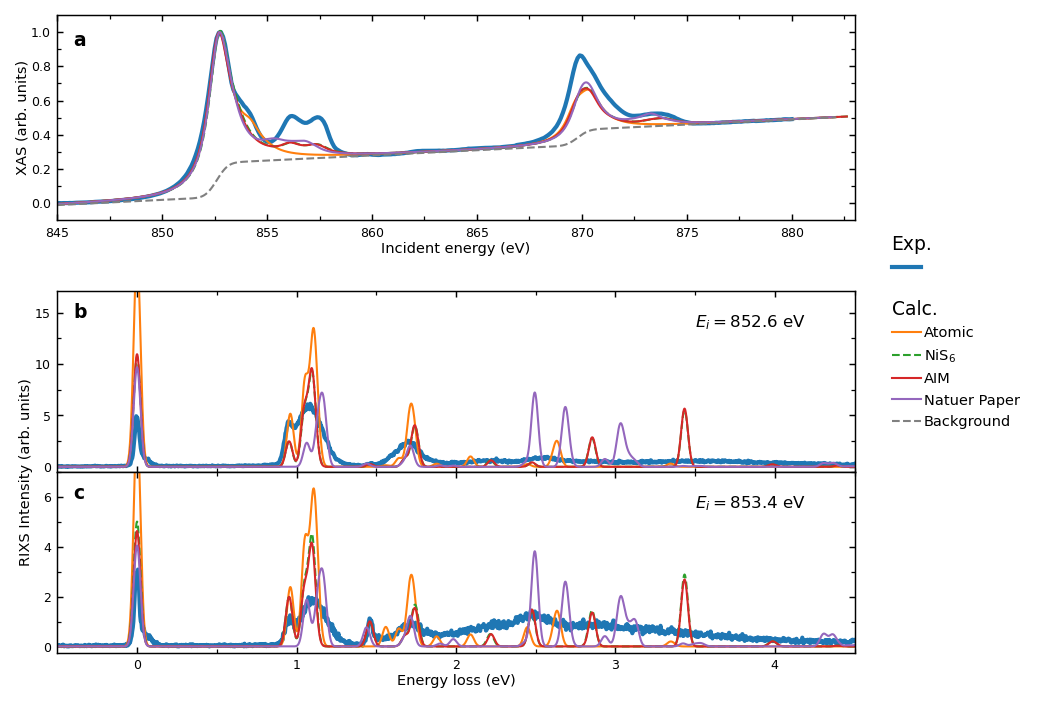

In [36]:
fig = plt.figure(dpi=dpi, figsize=(180*mm,120*mm))
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.8, top=0.99, bottom=0.7, wspace=0, hspace=0)
gs2 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.8, top=0.6, bottom=0.09, wspace=0, hspace=0,)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2]

axs[0].plot(xas['energy'][:], normalize(xas['TFY'][:]), color='C0', ls='-', lw=2)
axs[0].plot(Single_site_model['xas']['omega'][:], Single_site_model['xas']['LH'][:]+Single_site_model['xas']['bg'][:], color='C1', ls='-', label='Atomic')
axs[0].plot(Cluster_model['xas']['omega'][:], Cluster_model['xas']['LH'][:]+Cluster_model['xas']['bg'][:], color='C2', ls='--', label='NiS$_6$')
axs[0].plot(AIM_model['xas']['omega'][:], AIM_model['xas']['LH'][:]+AIM_model['xas']['bg'][:], color='C3', ls='-', label='AIM')
axs[0].plot(Nature_model1['xas']['omega'][:], Nature_model1['xas']['LH'][:]+Nature_model1['xas']['bg'][:], color='C4', ls='-', label='Natuer Paper')
axs[0].plot(Single_site_model['xas']['omega'][:], Single_site_model['xas']['bg'][:], color='gray', ls='--', label='Background')

omega = 852.6
chooseE = np.argmin(abs(Emap_data['Ei'][:]-omega))
axs[1].plot(Emap_data['eloss'][:], Emap_data['intensity'][chooseE,:], '-', color='C0', label=' ', lw=2)
chooseE = np.argmin(abs(Single_site_model['rixs']['omega'][:]-omega))
axs[1].plot(Single_site_model['rixs']['eloss'][:], Single_site_model['rixs']['LH'][chooseE,:]*scale, '-', color='C1',)
chooseE = np.argmin(abs(Cluster_model['rixs']['omega'][:]-omega))
axs[1].plot(Cluster_model['rixs']['eloss'][:], Cluster_model['rixs']['LH'][chooseE,:]*scale, '--', color='C2',)
chooseE = np.argmin(abs(AIM_model['rixs']['omega'][:]-omega))
axs[1].plot(AIM_model['rixs']['eloss'][:], AIM_model['rixs']['LH'][chooseE,:]*scale, '-', color='C3',)
chooseE = np.argmin(abs(Nature_model1['rixs']['omega'][:]-omega))
axs[1].plot(Nature_model1['rixs']['eloss'][:], Nature_model1['rixs']['LH'][chooseE,:]*scale, '-', color='C4',)

omega = 853.4
chooseE = np.argmin(abs(Emap_data['Ei'][:]-omega))
axs[2].plot(Emap_data['eloss'][:], Emap_data['intensity'][chooseE,:], '-', color='C0', lw=2)
chooseE = np.argmin(abs(Single_site_model['rixs']['omega'][:]-omega))
axs[2].plot(Single_site_model['rixs']['eloss'][:], Single_site_model['rixs']['LH'][chooseE,:]*scale, '-', color='C1',)
chooseE = np.argmin(abs(Cluster_model['rixs']['omega'][:]-omega))
axs[2].plot(Cluster_model['rixs']['eloss'][:], Cluster_model['rixs']['LH'][chooseE,:]*scale, '--', color='C2',)
chooseE = np.argmin(abs(AIM_model['rixs']['omega'][:]-omega))
axs[2].plot(AIM_model['rixs']['eloss'][:], AIM_model['rixs']['LH'][chooseE,:]*scale, '-', color='C3',)
chooseE = np.argmin(abs(Nature_model1['rixs']['omega'][:]-omega))
axs[2].plot(Nature_model1['rixs']['eloss'][:], Nature_model1['rixs']['LH'][chooseE,:]*scale, '-', color='C4',)


# axis range
axs[0].set_xticks(np.arange(845,880.1,5))
axs[0].set_xlim(845,883)
axs[0].set_ylim(-0.1,1.1)

axs[1].set_xlim(-0.5, 4.5)
axs[1].set_ylim(-0.5, 17.1)
axs[2].set_xlim(-0.5, 4.5)
axs[2].set_ylim(-0.25, 7)



for ax in axs:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
# axis label
axs[0].set_xlabel('Incident energy (eV)')
axs[0].set_ylabel('XAS (arb. units)')

axs[2].set_xlabel('Energy loss (eV)')
axs[1].set_ylabel('RIXS Intensity (arb. units)', y=0, )


# legend
axs[1].legend(title='Exp.', title_fontsize=9, alignment='left', loc='center left', bbox_to_anchor=(1.03, 1.2),)
axs[0].legend(title='Calc.', title_fontsize=9, alignment='left', loc='center left', bbox_to_anchor=(1.03, -0.7),)

x = 0.8
y = 0.8
axs[1].text(x=x, y=y, s='$E_i = 852.6$ eV', transform=axs[1].transAxes, color='k', fontsize=8)
axs[2].text(x=x, y=y, s='$E_i = 853.4$ eV', transform=axs[2].transAxes, color='k', fontsize=8)

# label
x = 0.02
y = 0.85
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')
axs[2].text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[2].transAxes, color='k')



fig.savefig('SI_ED_compare.pdf', dpi=300)



# Supplementary Fig 7

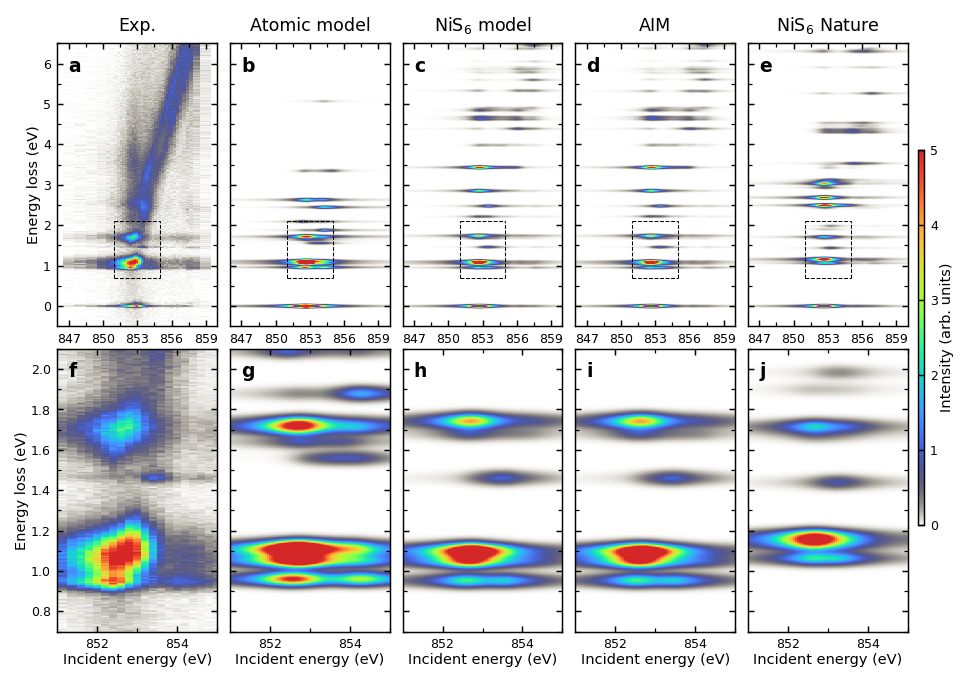

In [37]:
fig, axs = plt.subplots(2, 5, dpi=dpi, figsize=(180*mm,120*mm), 
                        gridspec_kw=dict(wspace=0.08, hspace=0.08, top=0.93, left=0.1, bottom=0.1,right=0.9))
cax = fig.add_axes([0.91,0.1+0.15,0.005,0.93-0.1-0.3]) # axis for colorbar

colormap=turbo_w()


ims = [[0,0,0,0,0,],[0,0,0,0,0,]]
ims[0][0] = plot2d(ax=axs[0,0], x=Emap_data['Ei'][:], y=Emap_data['eloss'][:], Int=Emap_data['intensity'][:], colormap=colormap, rasterized=True)
ims[1][0] = plot2d(ax=axs[1,0], x=Emap_data['Ei'][:], y=Emap_data['eloss'][:], Int=Emap_data['intensity'][:], colormap=colormap, rasterized=True)
ims[0][1] = plot2d(ax=axs[0,1], x=Single_site_model['rixs']['omega'][:], y=Single_site_model['rixs']['eloss'][:], Int=Single_site_model['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)
ims[1][1] = plot2d(ax=axs[1,1], x=Single_site_model['rixs']['omega'][:], y=Single_site_model['rixs']['eloss'][:], Int=Single_site_model['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)
ims[0][2] = plot2d(ax=axs[0,2], x=Cluster_model['rixs']['omega'][:], y=Cluster_model['rixs']['eloss'][:], Int=Cluster_model['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)
ims[1][2] = plot2d(ax=axs[1,2], x=Cluster_model['rixs']['omega'][:], y=Cluster_model['rixs']['eloss'][:], Int=Cluster_model['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)
ims[0][3] = plot2d(ax=axs[0,3], x=AIM_model['rixs']['omega'][:], y=AIM_model['rixs']['eloss'][:], Int=AIM_model['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)
ims[1][3] = plot2d(ax=axs[1,3], x=AIM_model['rixs']['omega'][:], y=AIM_model['rixs']['eloss'][:], Int=AIM_model['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)
ims[0][4] = plot2d(ax=axs[0,4], x=Nature_model1['rixs']['omega'][:], y=Nature_model1['rixs']['eloss'][:], Int=Nature_model1['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)
ims[1][4] = plot2d(ax=axs[1,4], x=Nature_model1['rixs']['omega'][:], y=Nature_model1['rixs']['eloss'][:], Int=Nature_model1['rixs']['LH'][:]*scale, colormap=colormap, rasterized=True)


# axis range
for i in range(5):
    axs[0,i].set_xticks(np.arange(847,860.1,3))
    axs[1,i].set_xticks([852,854])
    axs[0,i].set_xlim(846,860)
    axs[0,i].set_ylim(-0.5,6.5)
    axs[1,i].set_xlim(851,855)
    axs[1,i].set_ylim(0.7,2.1)
plt.setp([ax.get_yticklabels() for ax in axs[:,1:].flatten()], visible=False)

# dashed box
for i in range(5):
    axs[0,i].plot([851,851], [0.7,2.1], 'k--', lw=0.5)
    axs[0,i].plot([855,855], [0.7,2.1], 'k--', lw=0.5)
    axs[0,i].plot([851,855], [0.7,0.7], 'k--', lw=0.5)
    axs[0,i].plot([851,855], [2.1,2.1], 'k--', lw=0.5)

for ax in axs.flatten():
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
# axis label
for ax in axs[1,:]:
    ax.set_xlabel('Incident energy (eV)')
    
axs[0,0].set_ylabel('Energy loss (eV)')
axs[1,0].set_ylabel('Energy loss (eV)')


# colorbar
for im in np.array(ims).flatten():
    im.set_clim(0, 5)
cbar = plt.colorbar(ims[0][0], cax=cax)
cbar.set_ticks(np.arange(0, 5.1, 1))
cbar.set_label('Intensity (arb. units)')

# title
axs[0,0].set_title('Exp.')
axs[0,1].set_title('Atomic model')
axs[0,2].set_title('NiS$_6$ model')
axs[0,3].set_title('AIM')
axs[0,4].set_title('NiS$_6$ Nature')




# label
x = 0.07
y = 0.9
axs[0,0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,0].transAxes, color='k')
axs[0,1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,1].transAxes, color='k')
axs[0,2].text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,2].transAxes, color='k')
axs[0,3].text(x=x, y=y, s='d', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,3].transAxes, color='k')
axs[0,4].text(x=x, y=y, s='e', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,4].transAxes, color='k')
axs[1,0].text(x=x, y=y, s='f', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,0].transAxes, color='k')
axs[1,1].text(x=x, y=y, s='g', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,1].transAxes, color='k')
axs[1,2].text(x=x, y=y, s='h', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,2].transAxes, color='k')
axs[1,3].text(x=x, y=y, s='i', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,3].transAxes, color='k')
axs[1,4].text(x=x, y=y, s='j', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,4].transAxes, color='k')


fig.savefig('SI_ED_compare_Emap.pdf', dpi=300)



# Supplementary Fig 8

In [38]:
AIM_rixs_sim_no_field = h5_file('data/edrixs/rixs_no_field.hdf', 'r')
AIM_rixs_sim_field_all = h5_file('data/edrixs/rixs_field_all.hdf', 'r')

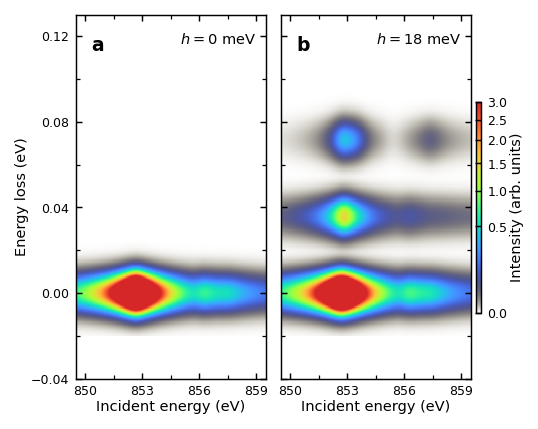

In [39]:
# plt.close('all')
fig, axs = plt.subplots(1, 2, dpi=dpi, figsize=(88*mm,70*mm), sharex=True, sharey=True, gridspec_kw=dict(wspace=0.08, top=0.99, left=0.14, bottom=0.11,right=0.9))
cax = fig.add_axes([0.91,0.12+0.15,0.01,0.93-0.12-0.3]) # axis for colorbar
colormap=turbo_w()

ims = [0,0,]
ims[0] = plot2d(ax=axs[0], x=AIM_rixs_sim_no_field['omega'][:], y=AIM_rixs_sim_no_field['eloss'][:], Int=AIM_rixs_sim_no_field['LH'][:], colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[1], x=AIM_rixs_sim_field_all['omega'][:], y=AIM_rixs_sim_field_all['eloss'][:], Int=AIM_rixs_sim_field_all['LH'][:], colormap=colormap, rasterized=True)

# axis range
for ax in axs.flatten():
    ax.set_xlim(849.5,859.5)
    ax.set_ylim(-0.03,0.13)
    ax.set_xticks(np.arange(850,860.1,3))
    ax.set_yticks(np.arange(-0.04,0.13,0.04))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
# axis label
axs[0].set_ylabel('Energy loss (eV)')
axs[0].set_xlabel('Incident energy (eV)')
axs[1].set_xlabel('Incident energy (eV)')


# colorbar
for im in ims:
    im.set_norm(col.PowerNorm(gamma=0.5))
    im.set_clim(0, 3)
    

cbar = plt.colorbar(ims[0], cax=cax)
cbar.set_ticks(np.arange(0, 3.01, 0.5))
cbar.set_label('Intensity (arb. units)')


# label
x = 0.08
y = 0.9
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')

x = 0.95
y = 0.92
axs[0].text(x=x, y=y, s='$h = 0$ meV', fontdict=dict(fontsize=7), transform=axs[0].transAxes, color='k', ha='right')
axs[1].text(x=x, y=y, s='$h = 18$ meV', fontdict=dict(fontsize=7), transform=axs[1].transAxes, color='k', ha='right')

fig.savefig('SI_Resonance_comparison.pdf', dpi=300)

# Supplementary Fig 9

In [40]:
xas_analysis = h5_file('data/edrixs/xas_analysis_field.hdf', 'r')

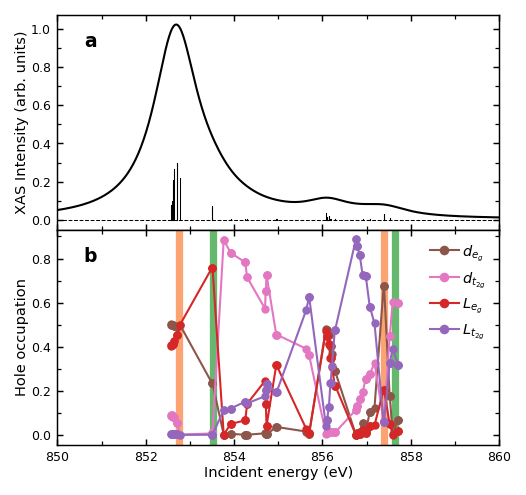

In [41]:
# plt.close('all')
fig, (ax1,ax2) = plt.subplots(2, 1, dpi=dpi, figsize=(88*mm,80*mm), sharex=True, gridspec_kw=dict(hspace=0, top=0.99, left=0.1, bottom=0.08, right=0.95))

alpha = 0.6
lw = 3.5
ax2.axvline(x=852.744, linestyle='-', color=color_m, lw=lw, alpha=alpha)
ax2.axvline(x=853.515, linestyle='-', color=color_e, lw=lw, alpha=alpha)
ax2.axvline(x=857.39, linestyle='-',color=color_m, lw=lw, alpha=alpha)
ax2.axvline(x=857.64, linestyle='-', color=color_e, lw=lw, alpha=alpha)



ax1.plot(xas_analysis['ominc_xas'][:], xas_analysis['xas_LH'][:]*6, color='k',)
for E, h, in zip(xas_analysis['xas_poles'][:], xas_analysis['sticks'][:]):
    ax1.plot([E, E], [0, h*6], '-', color='k', lw=0.5)
ax1.axhline(y=0, ls='--', color='k',lw=0.5)
    
ax1.set_xlabel('Incident energy (eV)')
ax1.set_ylabel('XAS Intensity (arb. units)')


ax2.plot(xas_analysis['xas_poles'][:80], xas_analysis['d_eg'][:80], '.-', label=r'$d_{e_g}$', color='C5')
ax2.plot(xas_analysis['xas_poles'][:80], xas_analysis['d_t2g'][:80], '.-', label=r'$d_{t_{2g}}$', color='C6')
ax2.plot(xas_analysis['xas_poles'][:80], xas_analysis['L_eg'][:80], '.-', label=r'$L_{e_g}$', color='C3')
ax2.plot(xas_analysis['xas_poles'][:80], xas_analysis['L_t2g'][:80], '.-', label=r'$L_{t_{2g}}$', color='C4')

ax2.set_xlabel('Incident energy (eV)')
ax2.set_ylabel('Hole occupation')

ax2.set_xlim(850,860)
ax2.legend()

# axis range
for ax in [ax1, ax2]:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# label
x = 0.06
y = 0.85
ax1.text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=ax1.transAxes, color='k')
ax2.text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=ax2.transAxes, color='k')

fig.savefig('SI_XAS_analysis.pdf', dpi=300)


# Supplementary Fig 10

In [42]:
rixs_analysis = h5_file('data/edrixs/rixs_analysis_field.hdf', 'r')

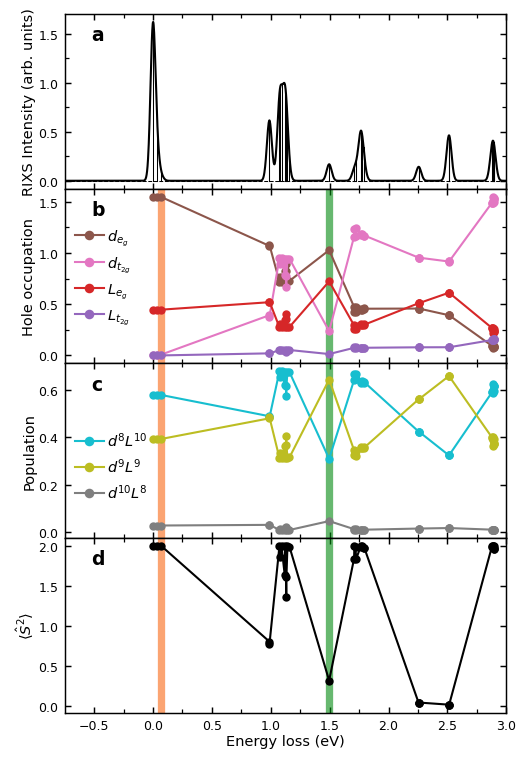

In [43]:
# plt.close('all')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, dpi=dpi, figsize=(88*mm,130*mm), sharex=True, gridspec_kw=dict(hspace=0, top=0.99, left=0.1, bottom=0.08, right=0.95))

alpha = 0.6
lw = 3.5
ax2.axvline(x=0.07, linestyle='-', color=color_m, lw=lw, alpha=alpha)
ax2.axvline(x=1.495, linestyle='-', color=color_e, lw=lw, alpha=alpha)
ax3.axvline(x=0.07, linestyle='-', color=color_m, lw=lw, alpha=alpha)
ax3.axvline(x=1.495, linestyle='-', color=color_e, lw=lw, alpha=alpha)
ax4.axvline(x=0.07, linestyle='-', color=color_m, lw=lw, alpha=alpha)
ax4.axvline(x=1.495, linestyle='-', color=color_e, lw=lw, alpha=alpha)



ax1.plot(rixs_analysis['eloss'][:], rixs_analysis['rixs_pol'][:], color='k',)
for E, h, in zip(rixs_analysis['rixs_poles'][:], rixs_analysis['rixs_sticks'][:]):
    ax1.plot([E, E], [0, h], '-', color='k', lw=0.5)
ax1.axhline(y=0, ls='--', color='k',lw=0.5)
    
ax1.set_ylabel('RIXS Intensity (arb. units)')

end = 39
ax2.plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['d_eg'][:end], '.-', label=r'$d_{e_g}$', color='C5')
ax2.plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['d_t2g'][:end], '.-', label=r'$d_{t_{2g}}$', color='C6')
ax2.plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['L_eg'][:end], '.-', label=r'$L_{e_g}$', color='C3')
ax2.plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['L_t2g'][:end], '.-', label=r'$L_{t_{2g}}$', color='C4')

ax2.set_ylabel('Hole occupation')

ax3.plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['alphas_rixs'][:end], '.-', label=r'$d^8{L}^{10}$', color='C9')
ax3.plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['betas_rixs'][:end], '.-', label='$d^9L^9$', color='C8')
ax3.plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['gammas_rixs'][:end], '.-', label='$d^{10}L^8$', color='C7')

ax3.set_ylabel('Population')

ax4.plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['S2_val'][:end], '.-', color='k')

ax4.set_xlabel('Energy loss (eV)')
ax4.set_ylabel(r'$\langle \hat{S}^2 \rangle$')

ax3.set_xlim(-0.75, 3)
ax2.legend(loc=(0.01,0.18))
ax3.legend(loc=(0.01,0.18))

# axis range
for ax in [ax1, ax2]:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# label
x = 0.06
y = 0.85
ax1.text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=ax1.transAxes, color='k')
ax2.text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=ax2.transAxes, color='k')
ax3.text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=ax3.transAxes, color='k')
ax4.text(x=x, y=y, s='d', fontdict=dict(fontsize=9,fontweight='bold'), transform=ax4.transAxes, color='k')

fig.savefig('SI_RIXS_analysis.pdf', dpi=300)


# Supplementary Fig 12

In [52]:
MagnonDispersion = h5_file('data/SWT/MagnonDispersion.hdf', 'r')

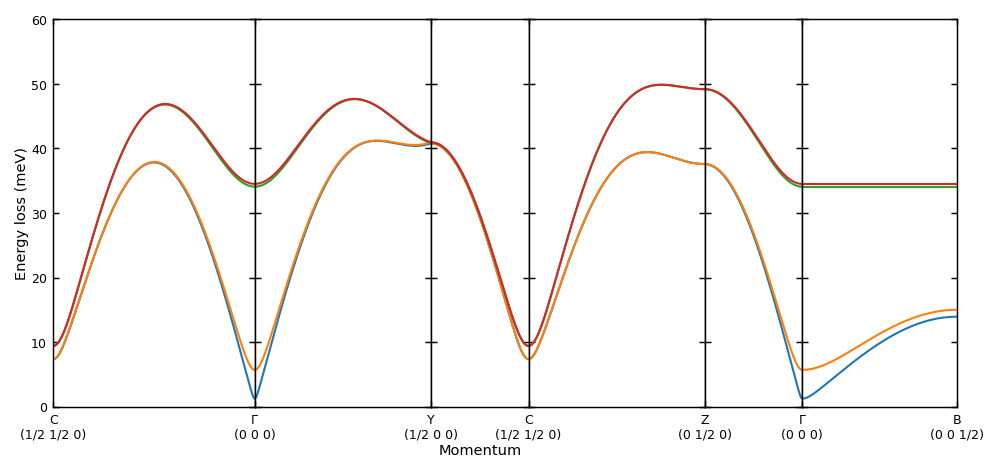

In [53]:
# list of Q points, in the order of H, K, L, label
dists = MagnonDispersion['dists'][:]
Num = dists.shape[0]

fig, axs = plt.subplots(1, Num, dpi=dpi, figsize=(180*mm,80*mm), sharey=True,
                        gridspec_kw=dict(wspace=0, left=0.1, right=0.95, bottom=0.17, top=0.99, 
                                         width_ratios=dists)
                       )

ymin = 0
ymax = 60
axs[0].set_ylim((ymin, ymax))

for ii in range(Num):
    gp_name = 'Q{:d}_to_Q{:d}'.format(ii, ii+1)
    axs[ii].plot(MagnonDispersion[gp_name]['xs'][:], MagnonDispersion[gp_name]['Es'][:], )
    axs[ii].set_xlim((0, MagnonDispersion[gp_name]['xs'][-1]))
    
    axs[ii].set_xticks([0])
    axs[ii].set_xticklabels([x.decode() for x in MagnonDispersion[gp_name]['Q_start_name'][:]])
    

axs[ii].set_xticks([0, MagnonDispersion[gp_name]['xs'][-1]])
axs[ii].set_xticklabels([x.decode() for x in MagnonDispersion[gp_name]['Q_start_name'][:]]+[x.decode() for x in MagnonDispersion[gp_name]['Q_end_name'][:]])

axs[int(Num/2)-1].set_xlabel('Momentum')
axs[0].set_ylabel('Energy loss (meV)')
fig.savefig('SI_Spinwaves.pdf', dpi=300)

# Supplementary Fig 13

In [54]:
twoMagnonDOS = h5_file('data/SWT/twoMagnonDOS.hdf', 'r')

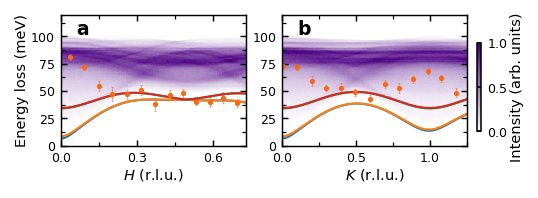

In [55]:
# plt.close('all')
fig, axs = plt.subplots(1, 2, dpi=dpi, figsize=(88*mm,30*mm), 
                        gridspec_kw=dict(wspace=0.2, left=0.1, right=0.88, bottom=0.25, top=0.99, 
                                         width_ratios=[1, 1])
                       )
colormap = mycmap


cax0 = fig.add_axes([0.9, 0.33, 0.008, 0.5]) # axis for colorbar

ims = [0,0]
ims[0] = plot2d(ax=axs[0], x=twoMagnonDOS['Hs'][:], y=twoMagnonDOS['Ecenter'][:], Int=twoMagnonDOS['hists1'][:]/7000, colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[1], x=twoMagnonDOS['Ks'][:], y=twoMagnonDOS['Ecenter'][:], Int=twoMagnonDOS['hists2'][:]/7000, colormap=colormap, rasterized=True)

x,y,yerr = np.loadtxt('data/RIXS_fits/H0L_40K_fits_2magnon_center.txt', delimiter='\t', comments='# ', unpack='True')
yerr = np.sqrt(yerr**2 + elasticLineError**2)
axs[0].errorbar(x, y, yerr=yerr,marker=marker_m, color=color_m, ls='',markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick)

x,y,yerr = np.loadtxt('data/RIXS_fits/0KL_40K_fits_2magnon_center.txt', delimiter='\t', comments='# ', unpack='True')
y = y
yerr = np.sqrt(yerr**2 + elasticLineError**2)
axs[1].errorbar(x, y, yerr=yerr,marker=marker_m, color=color_m, ls='',markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick)

axs[0].plot(twoMagnonDOS['H'][:], twoMagnonDOS['Es1'][:,0:4])
axs[1].plot(twoMagnonDOS['K'][:], twoMagnonDOS['Es2'][:,0:4])


# axis range
axs[0].set_xlim(0,0.73)
axs[1].set_xlim(0,1.25)
axs[0].set_ylim(0,120)
axs[1].set_ylim(0,120)


# ims[0].set_clim(0, 2)
# ims[1].set_clim(0, 2)


# axis label
axs[0].set_xticks((0, 0.3, 0.6,))
axs[1].set_xticks((0, 0.5, 1))
for ax in axs:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[0].set_xlabel(r'$H$ (r.l.u.)')
axs[1].set_xlabel(r'$K$ (r.l.u.)')
axs[0].set_ylabel('Energy loss (meV)')


# colorbar
cbar0 = plt.colorbar(ims[0], cax=cax0, orientation='vertical')
cbar0.set_ticks(np.arange(0, 1.01, 0.5))
cbar0.ax.tick_params(width=0.75, length=2)
cbar0.outline.set_linewidth(0.75)
cbar0.set_label('Intensity (arb. units)')


# label
x = 0.08
y = 0.85
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')


fig.savefig('SI_TwoMagnon_DOS.pdf', dpi=300)